In [102]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
try:
#     plt.style.use('belle2')
\
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# V9 Original

In [213]:
#Ddaughter_training_file = '/media/jykim/T7/storage_b2/storage/pi0etaveto/new_gE_300MEV/1M_traindata_sig_all.root'
training_file = '/media/jykim/T7/storage_b2/storage/pi0etaveto/new_gE_300MEV/pi0veto_test.root'

#pi0_like_filter = 'isSignal==1'
#signal_filter   = 'isSignal!=1'

signal_filter   = 'isSignal!=1 && daughter__bo1__cmgenMotherID__bc==0 && daughter__bo1__cmgenMotherPDG__bc==0 '
signal_filter_clean_roe =  'isSignal!=1 && ( daughter__bo1__cmgenMotherID__bc!=0 || daughter__bo1__cmgenMotherPDG__bc!=0) '

tree = 'pi0'



In [214]:
variables = ['isSignal','M','daughter__bo1__cmE__bc','cosHelicityAngleMomentum','daughter__bo0__cmgenMotherID__bc','daughter__bo0__cmgenMotherPDG__bc','daughter__bo1__cmclusterTotalMCMatchWeight__bc','daughter__bo1__cmclusterTheta__bc','daughter__bo1__cmclusterNHits__bc','daughter__bo1__cmclusterE9E21__bc','daughter__bo1__cmclusterZernikeMVA__bc']

In [215]:
#pi0_like_pd_df = get_pd(file=training_file , tree=tree, variables=variables ,base_filter=pi0_like_filter)
signal_pd_df   = get_pd(file=training_file , tree=tree, variables=variables ,base_filter=signal_filter)
signal_filter_clean_roe_pd_df   = get_pd(file=training_file , tree=tree, variables=variables ,base_filter=signal_filter_clean_roe)

In [216]:
signal_pd_df.describe()

,isSignal,M,daughter__bo1__cmE__bc,cosHelicityAngleMomentum,daughter__bo0__cmgenMotherID__bc,daughter__bo0__cmgenMotherPDG__bc,daughter__bo1__cmclusterTotalMCMatchWeight__bc,daughter__bo1__cmclusterTheta__bc,daughter__bo1__cmclusterNHits__bc,daughter__bo1__cmclusterE9E21__bc,daughter__bo1__cmclusterZernikeMVA__bc
count,0.0,1.110994e+06,1.110994e+06,1.110994e+06,1.110994e+06,1.110994e+06,1.110994e+06,1.110994e+06,1.110994e+06,1.110994e+06,1.110994e+06
mean,NaN,3.484562e-01,5.469180e-02,-9.512790e-01,9.789794e+00,4.204968e+02,3.266646e-02,1.637256e+00,4.595475e+00,9.722020e-01,3.094148e-01
std,NaN,2.383487e-01,6.812833e-02,8.938832e-02,3.108114e+00,2.057835e+01,7.026085e-02,7.703169e-01,1.677018e+00,6.526613e-02,2.241421e-01
min,NaN,4.847272e-03,2.000010e-02,-1.000000e+00,6.000000e+00,-4.210000e+02,0.000000e+00,2.264600e-01,2.148438e+00,1.318359e-01,3.906250e-03
25%,NaN,1.979739e-01,2.346828e-02,-9.903409e-01,8.000000e+00,4.210000e+02,0.000000e+00,9.228418e-01,2.929688e+00,9.863281e-01,1.152344e-01
50%,NaN,3.009163e-01,2.957177e-02,-9.780288e-01,9.000000e+00,4.210000e+02,0.000000e+00,1.719739e+00,3.906250e+00,1.000000e+00,2.646484e-01
75%,NaN,4.284094e-01,5.389841e-02,-9.506817e-01,1.000000e+01,4.210000e+02,3.568651e-02,2.399613e+00,5.078125e+00,1.000000e+00,4.746094e-01
max,NaN,5.459296e+00,3.796834e+00,9.934631e-01,5.000000e+01,4.210000e+02,3.638622e+00,2.681677e+00,2.109375e+01,1.000000e+00,9.550781e-01


In [217]:
signal_filter_clean_roe_pd_df.describe()

,isSignal,M,daughter__bo1__cmE__bc,cosHelicityAngleMomentum,daughter__bo0__cmgenMotherID__bc,daughter__bo0__cmgenMotherPDG__bc,daughter__bo1__cmclusterTotalMCMatchWeight__bc,daughter__bo1__cmclusterTheta__bc,daughter__bo1__cmclusterNHits__bc,daughter__bo1__cmclusterE9E21__bc,daughter__bo1__cmclusterZernikeMVA__bc
count,785751.0,792627.000000,792627.000000,792627.000000,792627.000000,792627.000000,792627.000000,792627.000000,792627.000000,792627.000000,792627.000000
mean,0.0,0.788337,0.258085,-0.791781,9.970704,420.578271,0.244828,1.293120,7.222361,0.963176,0.490333
std,0.0,0.556526,0.299222,0.295003,3.202073,18.839284,0.283728,0.605146,2.985044,0.055424,0.290893
min,0.0,0.007290,0.020003,-1.000000,6.000000,-421.000000,0.004328,0.226487,2.148438,0.079102,0.003906
25%,0.0,0.407079,0.098360,-0.964607,8.000000,421.000000,0.093308,0.809555,5.078125,0.953125,0.210938
50%,0.0,0.658743,0.171085,-0.902444,9.000000,421.000000,0.163557,1.224367,7.031250,0.982422,0.542969
75%,0.0,1.014485,0.289749,-0.755478,10.000000,421.000000,0.274830,1.730072,8.984375,1.000000,0.749023
max,0.0,7.070218,6.000298,0.999896,50.000000,421.000000,5.664738,2.681324,22.070312,1.000000,0.970703


## Draw plots


### pi0 veto

In [218]:
signal_beambkg_pd_df = signal_pd_df.query('daughter__bo1__cmclusterTotalMCMatchWeight__bc<0.055')
signal_hadron_pd_df = signal_pd_df.query('daughter__bo1__cmclusterTotalMCMatchWeight__bc>=0.055')


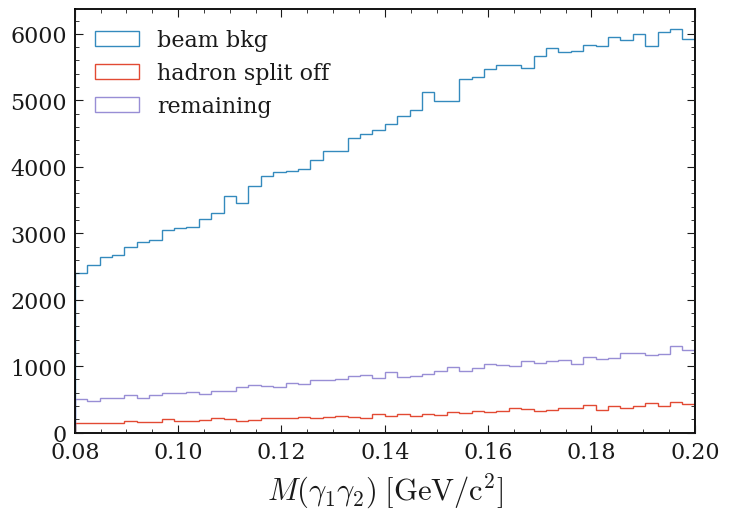

In [219]:
xrange = (0.08,0.2,51)
xm = np.linspace(*xrange)

plt.hist(signal_beambkg_pd_df['M'], label='beam bkg',bins=xm,  histtype='step') 
plt.hist(signal_hadron_pd_df['M'], label='hadron split off',bins=xm,  histtype='step')
plt.hist(signal_filter_clean_roe_pd_df['M'], label='remaining',bins=xm,  histtype='step')

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$M(\gamma_1\gamma_2)\; [\mathrm{GeV/c^2}] $'
#plot_title = r'A variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
#plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper left')

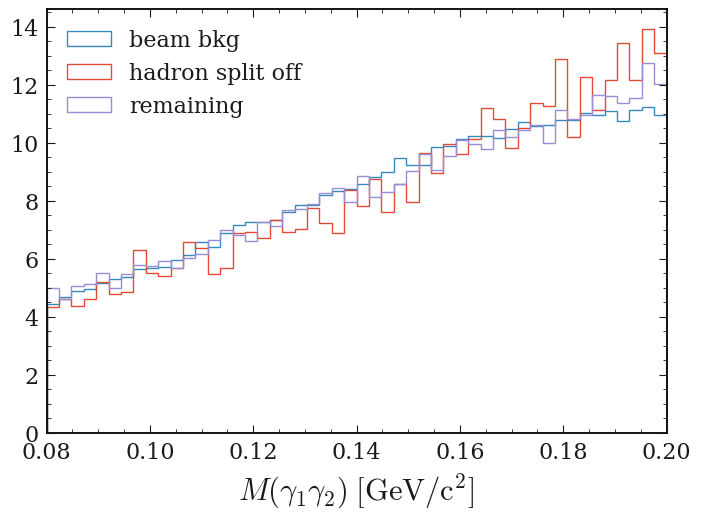

In [220]:
xrange = (0.08,0.2,51)
xm = np.linspace(*xrange)

plt.hist(signal_beambkg_pd_df['M'], label='beam bkg',bins=xm,  histtype='step', density=True) 
plt.hist(signal_hadron_pd_df['M'], label='hadron split off',bins=xm,  histtype='step', density=True)
plt.hist(signal_filter_clean_roe_pd_df['M'], label='remaining',bins=xm,  histtype='step', density=True)

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$M(\gamma_1\gamma_2)\; [\mathrm{GeV/c^2}] $'
plot_title = r'A variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
#plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper left')

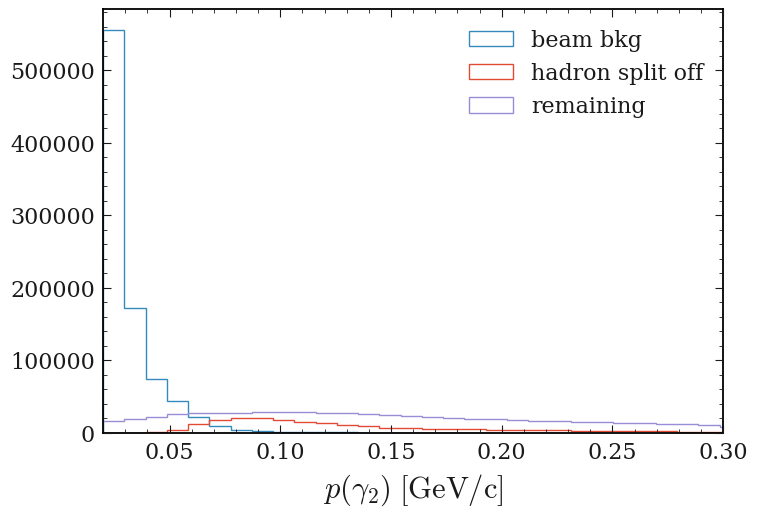

In [221]:
xrange = (0.02,0.5,51)
xm = np.linspace(*xrange)

plt.hist(signal_beambkg_pd_df['daughter__bo1__cmE__bc'], label='beam bkg',bins=xm,  histtype='step') 
plt.hist(signal_hadron_pd_df['daughter__bo1__cmE__bc'], label='hadron split off',bins=xm,  histtype='step')
plt.hist(signal_filter_clean_roe_pd_df['daughter__bo1__cmE__bc'], label='remaining',bins=xm,  histtype='step')

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_2)\; [\mathrm{GeV/c}] $'
#plot_title = r'A variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
ax.set_xlim(0.02,0.3)   

#plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

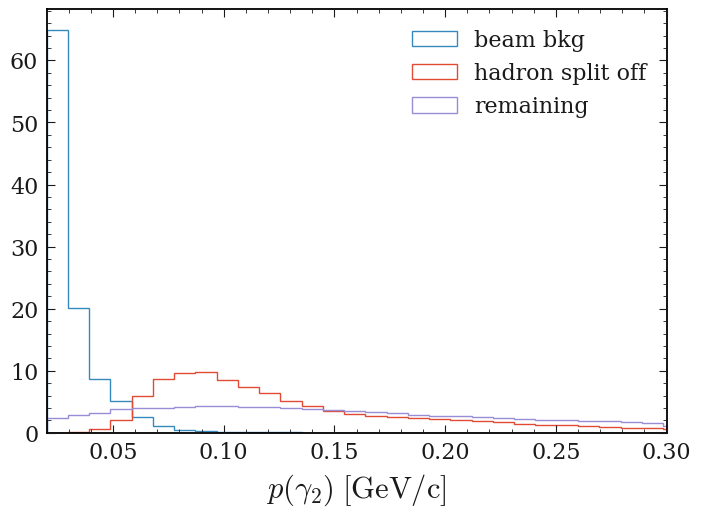

In [222]:
xrange = (0.02,0.5,51)
xm = np.linspace(*xrange)

plt.hist(signal_beambkg_pd_df['daughter__bo1__cmE__bc'], label='beam bkg',bins=xm,  histtype='step', density=True) 
plt.hist(signal_hadron_pd_df['daughter__bo1__cmE__bc'], label='hadron split off',bins=xm,  histtype='step', density=True)
plt.hist(signal_filter_clean_roe_pd_df['daughter__bo1__cmE__bc'], label='remaining',bins=xm,  histtype='step', density=True)

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_2)\; [\mathrm{GeV/c}] $'
#plot_title = r'A variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
ax.set_xlim(0.02,0.3) 
#plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

# V9 tight_mask

In [233]:
#Ddaughter_training_file = '/media/jykim/T7/storage_b2/storage/pi0etaveto/new_gE_300MEV/1M_traindata_sig_all.root'
training_file = '/media/jykim/T7/storage_b2/storage/pi0etaveto/new_gE_300MEV_MVA_mask/pi0veto_test.root'

#pi0_like_filter = 'isSignal==1'
signal_filter   = 'isSignal!=1'
signal_filter   += ' && daughter__bo1__cmgenMotherID__bc==0 && daughter__bo1__cmgenMotherPDG__bc==0 '
signal_filter_clean_roe =  'isSignal!=1 && ( daughter__bo1__cmgenMotherID__bc!=0 || daughter__bo1__cmgenMotherPDG__bc!=0) '

tree = 'pi0'



In [234]:
variables = ['isSignal','M','daughter__bo1__cmE__bc','cosHelicityAngleMomentum','daughter__bo0__cmgenMotherID__bc','daughter__bo0__cmgenMotherPDG__bc','daughter__bo1__cmclusterTotalMCMatchWeight__bc','daughter__bo1__cmclusterTheta__bc','daughter__bo1__cmclusterNHits__bc','daughter__bo1__cmclusterE9E21__bc','daughter__bo1__cmclusterZernikeMVA__bc']

In [235]:
#pi0_like_pd_df = get_pd(file=training_file , tree=tree, variables=variables ,base_filter=pi0_like_filter)
mask_signal_pd_df   = get_pd(file=training_file , tree=tree, variables=variables ,base_filter=signal_filter)
mask_signal_filter_clean_roe_pd_df   = get_pd(file=training_file , tree=tree, variables=variables ,base_filter=signal_filter_clean_roe)

In [236]:
mask_signal_pd_df.describe()

,isSignal,M,daughter__bo1__cmE__bc,cosHelicityAngleMomentum,daughter__bo0__cmgenMotherID__bc,daughter__bo0__cmgenMotherPDG__bc,daughter__bo1__cmclusterTotalMCMatchWeight__bc,daughter__bo1__cmclusterTheta__bc,daughter__bo1__cmclusterNHits__bc,daughter__bo1__cmclusterE9E21__bc,daughter__bo1__cmclusterZernikeMVA__bc
count,0.0,137475.000000,137475.000000,137475.000000,137475.000000,137475.000000,137475.000000,137475.000000,137475.000000,137475.000000,137475.000000
mean,NaN,0.654234,0.178611,-0.838599,9.768016,420.632515,0.159986,1.231668,6.411660,0.945039,0.313037
std,NaN,0.414521,0.139680,0.199179,3.092544,17.586630,0.135949,0.696100,2.481142,0.074971,0.254826
min,NaN,0.005976,0.050014,-0.999999,6.000000,-421.000000,0.000000,0.227314,2.148438,0.284180,0.004883
25%,NaN,0.366661,0.090731,-0.963382,8.000000,421.000000,0.078006,0.625174,4.882812,0.923828,0.073242
50%,NaN,0.563893,0.138026,-0.908640,9.000000,421.000000,0.125279,1.087518,6.054688,0.975586,0.251953
75%,NaN,0.841388,0.219681,-0.793243,10.000000,421.000000,0.203824,1.785219,8.007812,1.000000,0.525391
max,NaN,4.739986,2.571184,0.999598,43.000000,421.000000,2.460359,2.680736,21.093750,1.000000,0.944336


In [237]:
mask_signal_filter_clean_roe_pd_df.describe()

,isSignal,M,daughter__bo1__cmE__bc,cosHelicityAngleMomentum,daughter__bo0__cmgenMotherID__bc,daughter__bo0__cmgenMotherPDG__bc,daughter__bo1__cmclusterTotalMCMatchWeight__bc,daughter__bo1__cmclusterTheta__bc,daughter__bo1__cmclusterNHits__bc,daughter__bo1__cmclusterE9E21__bc,daughter__bo1__cmclusterZernikeMVA__bc
count,911307.0,918814.000000,918814.000000,918814.000000,918814.000000,918814.000000,918814.000000,918814.000000,918814.000000,918814.000000,918814.000000
mean,0.0,0.863635,0.297378,-0.760551,9.971008,420.579373,0.281657,1.258929,7.743847,0.963988,0.532764
std,0.0,0.576549,0.317014,0.316313,3.201103,18.814660,0.300809,0.589310,2.977087,0.050464,0.282978
min,0.0,0.010570,0.050002,-1.000000,6.000000,-421.000000,0.011853,0.226734,2.148438,0.138672,0.003906
25%,0.0,0.471628,0.122879,-0.953671,8.000000,421.000000,0.116636,0.786304,5.859375,0.953125,0.293945
50%,0.0,0.735079,0.200645,-0.879863,9.000000,421.000000,0.189676,1.184529,7.031250,0.980469,0.602539
75%,0.0,1.097597,0.335429,-0.708740,10.000000,421.000000,0.318047,1.678768,9.179688,1.000000,0.776367
max,0.0,7.070218,6.321738,0.999983,47.000000,421.000000,5.664738,2.681782,22.070312,1.000000,0.970703


## Draw plots


### pi0 veto

In [228]:
mask_signal_beambkg_pd_df = mask_signal_pd_df.query('daughter__bo1__cmclusterTotalMCMatchWeight__bc<0.055')
mask_signal_hadron_pd_df = mask_signal_pd_df.query('daughter__bo1__cmclusterTotalMCMatchWeight__bc>=0.055')


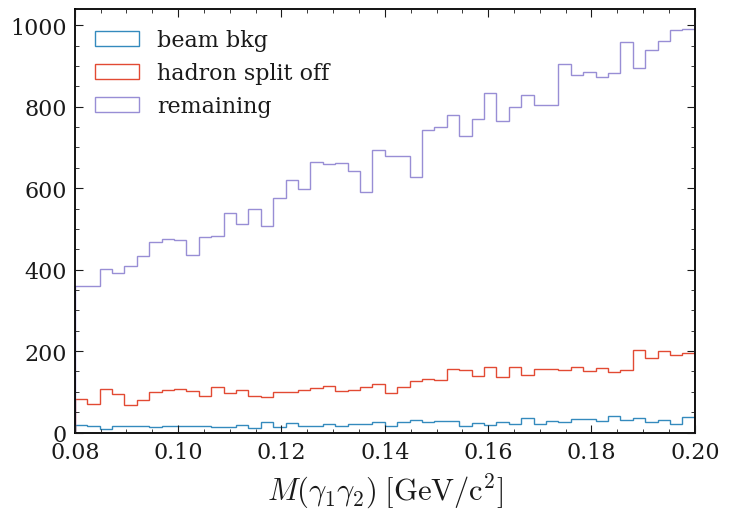

In [229]:
xrange = (0.08,0.2,51)
xm = np.linspace(*xrange)

plt.hist(mask_signal_beambkg_pd_df['M'], label='beam bkg',bins=xm,  histtype='step') 
plt.hist(mask_signal_hadron_pd_df['M'], label='hadron split off',bins=xm,  histtype='step')
plt.hist(mask_signal_filter_clean_roe_pd_df['M'], label='remaining',bins=xm,  histtype='step')

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$M(\gamma_1\gamma_2)\; [\mathrm{GeV/c^2}] $'
#plot_title = r'A variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
#plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper left')

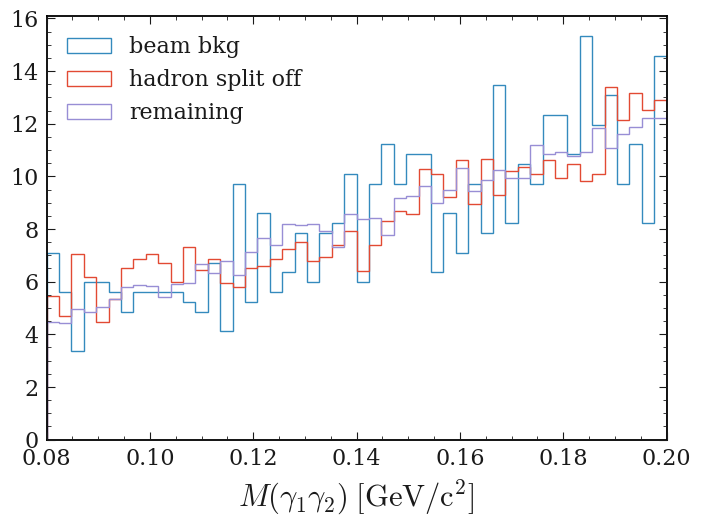

In [230]:
xrange = (0.08,0.2,51)
xm = np.linspace(*xrange)

plt.hist(mask_signal_beambkg_pd_df['M'], label='beam bkg',bins=xm,  histtype='step', density=True) 
plt.hist(mask_signal_hadron_pd_df['M'], label='hadron split off',bins=xm,  histtype='step', density=True)
plt.hist(mask_signal_filter_clean_roe_pd_df['M'], label='remaining',bins=xm,  histtype='step', density=True)

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$M(\gamma_1\gamma_2)\; [\mathrm{GeV/c^2}] $'
plot_title = r'A variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
#plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper left')

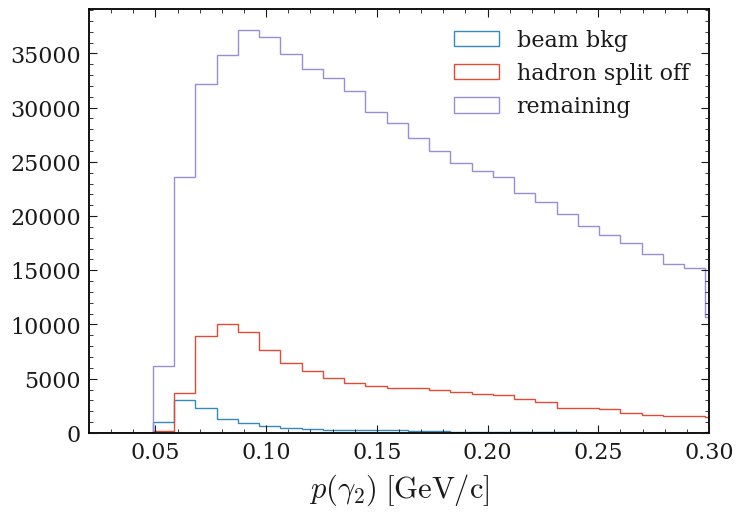

In [231]:
xrange = (0.02,0.5,51)
xm = np.linspace(*xrange)

plt.hist(mask_signal_beambkg_pd_df['daughter__bo1__cmE__bc'], label='beam bkg',bins=xm,  histtype='step') 
plt.hist(mask_signal_hadron_pd_df['daughter__bo1__cmE__bc'], label='hadron split off',bins=xm,  histtype='step')
plt.hist(mask_signal_filter_clean_roe_pd_df['daughter__bo1__cmE__bc'], label='remaining',bins=xm,  histtype='step')

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_2)\; [\mathrm{GeV/c}] $'
#plot_title = r'A variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
ax.set_xlim(0.02,0.3)   

#plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

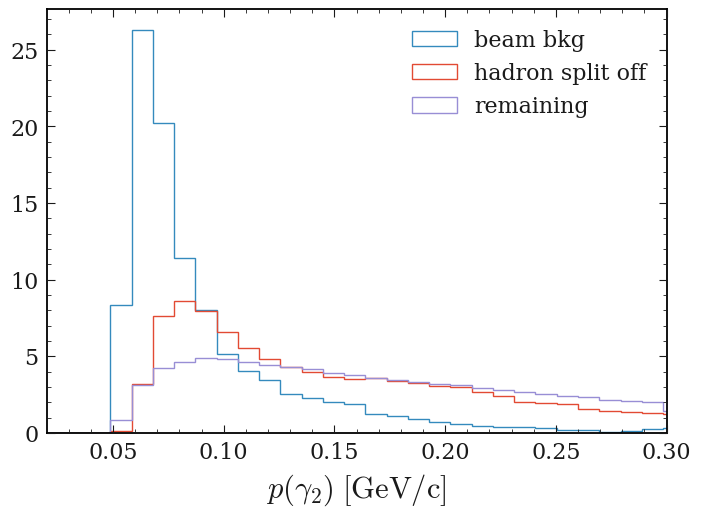

In [232]:
xrange = (0.02,0.5,51)
xm = np.linspace(*xrange)

plt.hist(mask_signal_beambkg_pd_df['daughter__bo1__cmE__bc'], label='beam bkg',bins=xm,  histtype='step', density=True) 
plt.hist(mask_signal_hadron_pd_df['daughter__bo1__cmE__bc'], label='hadron split off',bins=xm,  histtype='step', density=True)
plt.hist(mask_signal_filter_clean_roe_pd_df['daughter__bo1__cmE__bc'], label='remaining',bins=xm,  histtype='step', density=True)

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_2)\; [\mathrm{GeV/c}] $'
#plot_title = r'A variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
ax.set_xlim(0.02,0.3) 
#plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

# V1 g2 only minium 50 MeV

In [245]:
#Ddaughter_training_file = '/media/jykim/T7/storage_b2/storage/pi0etaveto/new_gE_300MEV/1M_traindata_sig_all.root'
training_file = '/media/jykim/T7/storage_b2/storage/pi0etaveto/new_gE_300MEV_no_mask_50MEV/pi0veto_test.root'

#pi0_like_filter = 'isSignal==1'
signal_filter   = 'isSignal!=1'
signal_filter   += ' && daughter__bo1__cmgenMotherID__bc==0 && daughter__bo1__cmgenMotherPDG__bc==0 '
signal_filter_clean_roe =  'isSignal!=1 && ( daughter__bo1__cmgenMotherID__bc!=0 || daughter__bo1__cmgenMotherPDG__bc!=0) '

tree = 'pi0'



In [246]:
variables = ['isSignal','M','daughter__bo1__cmE__bc','cosHelicityAngleMomentum','daughter__bo0__cmgenMotherID__bc','daughter__bo0__cmgenMotherPDG__bc','daughter__bo1__cmclusterTotalMCMatchWeight__bc','daughter__bo1__cmclusterTheta__bc','daughter__bo1__cmclusterNHits__bc','daughter__bo1__cmclusterE9E21__bc','daughter__bo1__cmclusterZernikeMVA__bc']

In [244]:
#pi0_like_pd_df = get_pd(file=training_file , tree=tree, variables=variables ,base_filter=pi0_like_filter)
signal_pd_df   = get_pd(file=training_file , tree=tree, variables=variables ,base_filter=signal_filter)
signal_filter_clean_roe_pd_df   = get_pd(file=training_file , tree=tree, variables=variables ,base_filter=signal_filter_clean_roe)

In [247]:
signal_pd_df.describe()

,isSignal,M,daughter__bo1__cmE__bc,cosHelicityAngleMomentum,daughter__bo0__cmgenMotherID__bc,daughter__bo0__cmgenMotherPDG__bc,daughter__bo1__cmclusterTotalMCMatchWeight__bc,daughter__bo1__cmclusterTheta__bc,daughter__bo1__cmclusterNHits__bc,daughter__bo1__cmclusterE9E21__bc,daughter__bo1__cmclusterZernikeMVA__bc
count,0.0,431304.000000,431304.000000,431304.000000,431304.000000,431304.000000,431304.000000,431304.000000,431304.000000,431304.000000,431304.000000
mean,NaN,0.548262,0.126945,-0.885509,9.811831,420.527563,0.106144,1.311722,5.615652,0.948692,0.260751
std,NaN,0.334102,0.099361,0.147069,3.127919,19.939151,0.102138,0.717874,2.113196,0.077038,0.244635
min,NaN,0.006826,0.050000,-1.000000,6.000000,-421.000000,0.000000,0.226460,2.148438,0.125977,0.003906
25%,NaN,0.318342,0.067548,-0.971452,8.000000,421.000000,0.051117,0.687973,3.906250,0.930664,0.048828
50%,NaN,0.482661,0.096537,-0.934449,9.000000,421.000000,0.087252,1.200568,5.078125,0.983398,0.163086
75%,NaN,0.697748,0.149118,-0.860043,10.000000,421.000000,0.138523,1.889276,7.031250,1.000000,0.448242
max,NaN,5.244025,2.888214,0.993463,45.000000,421.000000,2.749502,2.681762,21.093750,1.000000,0.952148


In [248]:
signal_filter_clean_roe_pd_df.describe()

,isSignal,M,daughter__bo1__cmE__bc,cosHelicityAngleMomentum,daughter__bo0__cmgenMotherID__bc,daughter__bo0__cmgenMotherPDG__bc,daughter__bo1__cmclusterTotalMCMatchWeight__bc,daughter__bo1__cmclusterTheta__bc,daughter__bo1__cmclusterNHits__bc,daughter__bo1__cmclusterE9E21__bc,daughter__bo1__cmclusterZernikeMVA__bc
count,1048695.0,1.056751e+06,1.056751e+06,1.056751e+06,1.056751e+06,1.056751e+06,1.056751e+06,1.056751e+06,1.056751e+06,1.056751e+06,1.056751e+06
mean,0.0,8.266697e-01,2.757002e-01,-7.774340e-01,9.970326e+00,4.206048e+02,2.615064e-01,1.278231e+00,7.463310e+00,9.615506e-01,4.950035e-01
std,0.0,5.590783e-01,3.020466e-01,3.015685e-01,3.202913e+00,1.823748e+01,2.863905e-01,6.023744e-01,2.948734e+00,5.554772e-02,2.944861e-01
min,0.0,9.295893e-03,5.000024e-02,-1.000000e+00,6.000000e+00,-4.210000e+02,1.206945e-02,2.267944e-01,2.148438e+00,1.250000e-01,3.906250e-03
25%,0.0,4.482290e-01,1.131977e-01,-9.573457e-01,8.000000e+00,4.210000e+02,1.085211e-01,7.945440e-01,5.078125e+00,9.511719e-01,2.080078e-01
50%,0.0,7.006241e-01,1.845022e-01,-8.895659e-01,9.000000e+00,4.210000e+02,1.755703e-01,1.207253e+00,7.031250e+00,9.804688e-01,5.546875e-01
75%,0.0,1.051137e+00,3.046293e-01,-7.338613e-01,1.000000e+01,4.210000e+02,2.889771e-01,1.713041e+00,8.984375e+00,1.000000e+00,7.568359e-01
max,0.0,6.909320e+00,5.974352e+00,9.999209e-01,5.000000e+01,4.210000e+02,5.672069e+00,2.681294e+00,2.207031e+01,1.000000e+00,9.707031e-01


## Draw plots


### pi0 veto

In [249]:
signal_beambkg_pd_df = signal_pd_df.query('daughter__bo1__cmclusterTotalMCMatchWeight__bc<0.055')
signal_hadron_pd_df = signal_pd_df.query('daughter__bo1__cmclusterTotalMCMatchWeight__bc>=0.055')


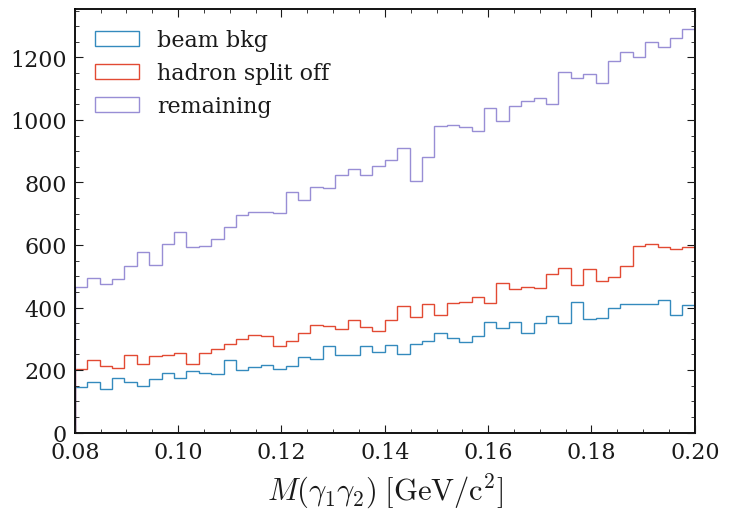

In [250]:
xrange = (0.08,0.2,51)
xm = np.linspace(*xrange)

plt.hist(signal_beambkg_pd_df['M'], label='beam bkg',bins=xm,  histtype='step') 
plt.hist(signal_hadron_pd_df['M'], label='hadron split off',bins=xm,  histtype='step')
plt.hist(signal_filter_clean_roe_pd_df['M'], label='remaining',bins=xm,  histtype='step')

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$M(\gamma_1\gamma_2)\; [\mathrm{GeV/c^2}] $'
#plot_title = r'A variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
#plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper left')

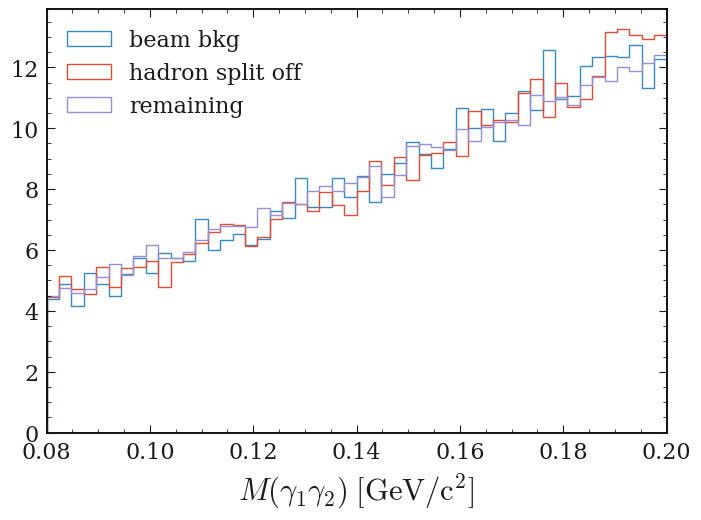

In [251]:
xrange = (0.08,0.2,51)
xm = np.linspace(*xrange)

plt.hist(signal_beambkg_pd_df['M'], label='beam bkg',bins=xm,  histtype='step', density=True) 
plt.hist(signal_hadron_pd_df['M'], label='hadron split off',bins=xm,  histtype='step', density=True)
plt.hist(signal_filter_clean_roe_pd_df['M'], label='remaining',bins=xm,  histtype='step', density=True)

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$M(\gamma_1\gamma_2)\; [\mathrm{GeV/c^2}] $'
plot_title = r'A variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
#plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper left')

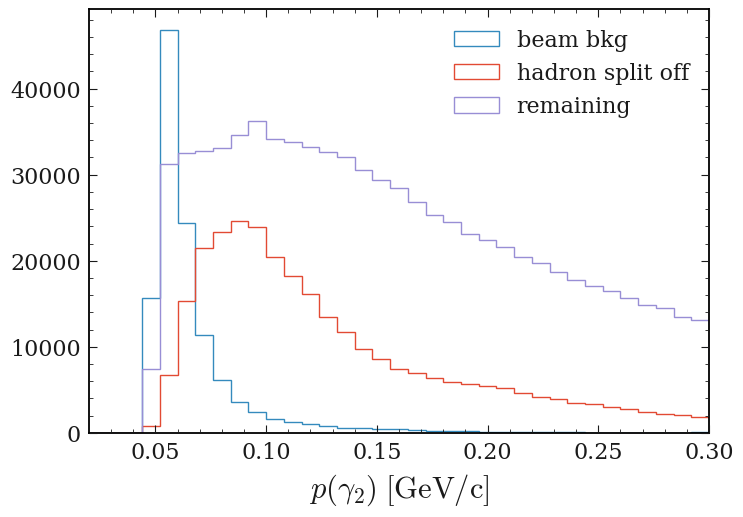

In [254]:
xrange = (0.02,0.5,61)
xm = np.linspace(*xrange)

plt.hist(signal_beambkg_pd_df['daughter__bo1__cmE__bc'], label='beam bkg',bins=xm,  histtype='step') 
plt.hist(signal_hadron_pd_df['daughter__bo1__cmE__bc'], label='hadron split off',bins=xm,  histtype='step')
plt.hist(signal_filter_clean_roe_pd_df['daughter__bo1__cmE__bc'], label='remaining',bins=xm,  histtype='step')

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_2)\; [\mathrm{GeV/c}] $'
#plot_title = r'A variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
ax.set_xlim(0.02,0.3)   

#plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

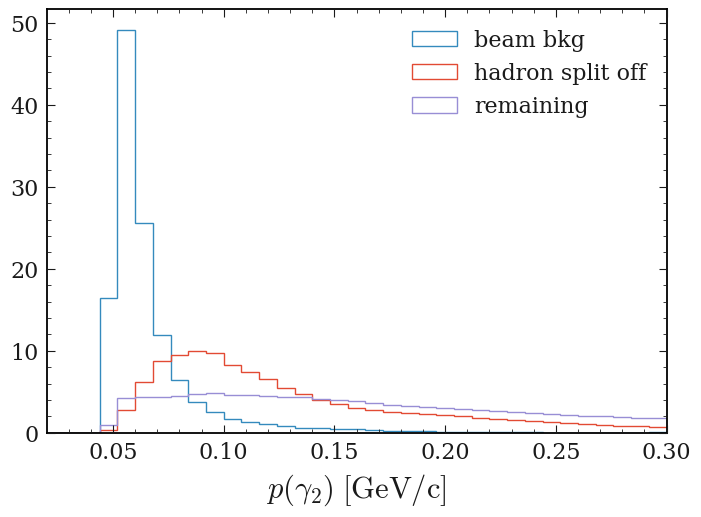

In [255]:
xrange = (0.02,0.5,61)
xm = np.linspace(*xrange)

plt.hist(signal_beambkg_pd_df['daughter__bo1__cmE__bc'], label='beam bkg',bins=xm,  histtype='step', density=True) 
plt.hist(signal_hadron_pd_df['daughter__bo1__cmE__bc'], label='hadron split off',bins=xm,  histtype='step', density=True)
plt.hist(signal_filter_clean_roe_pd_df['daughter__bo1__cmE__bc'], label='remaining',bins=xm,  histtype='step', density=True)

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\gamma_2)\; [\mathrm{GeV/c}] $'
#plot_title = r'A variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
ax.set_xlim(0.02,0.3) 
#plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

## Draw plots


### pi0 veto

In [17]:
# type(xrange)

/home/jykim/anaconda3/envs/draw/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


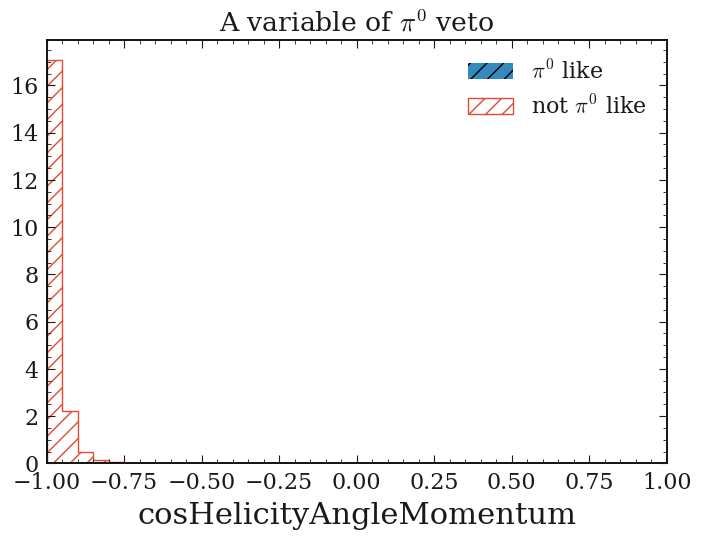

In [18]:
xrange = (-1,1,41)
xm = np.linspace(*xrange)

plt.hist(pi0_like_pd_df['cosHelicityAngleMomentum'], label='$\pi^0$ like',bins=xm,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(signal_pd_df['cosHelicityAngleMomentum'], label='not $\pi^0$ like',bins=xm,  histtype='step', density=True, hatch="//")

ax = plt.gca()
ax.set_xlim(-1,1)   
xlabel = 'cosHelicityAngleMomentum'
plot_title = r'A variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

# FBDT v3 variables

In [2]:
variables = ['isSignal','M','daughter__bo1__cmE__bc','cosHelicityAngleMomentum','isSignal','daughter__bo1__cmclusterTheta__bc','daughter__bo1__cmclusterNHits__bc','daughter__bo1__cmclusterE9E21__bc','daughter__bo1__cmclusterZernikeMVA__bc']

In [3]:
training_file = '/media/jykim/T7/storage/workspace/06_MVA/my_pi0etaveto/train_v3_700MEV/pi0veto_train.root'

training_file = '/media/jykim/T7/storage/workspace/06_MVA/my_pi0etaveto/train_v2_new/pi0veto_train.root'

In [4]:
pi0_like_filter = 'isSignal==1'
signal_filter    = 'isSignal!=1'

tree = 'pi0'

In [5]:
pi0_like_pd_df = get_pd(file=training_file , tree=tree, variables=variables ,base_filter=pi0_like_filter)
signal_pd_df   = get_pd(file=training_file , tree=tree, variables=variables ,base_filter=signal_filter)

In [6]:
pi0_like_pd_df.describe()

,isSignal,M,daughter__bo1__cmE__bc,cosHelicityAngleMomentum,daughter__bo1__cmclusterTheta__bc,daughter__bo1__cmclusterNHits__bc,daughter__bo1__cmclusterE9E21__bc,daughter__bo1__cmclusterZernikeMVA__bc
count,11369021.0,1.136902e+07,1.136902e+07,1.136902e+07,1.136902e+07,1.136902e+07,1.136902e+07,1.136902e+07
mean,1.0,1.316548e-01,3.240340e-01,-4.507069e-01,1.261902e+00,7.583075e+00,9.744990e-01,5.568306e-01
std,0.0,1.522671e-02,4.117901e-01,3.971479e-01,5.305793e-01,3.235687e+00,3.692899e-02,2.631485e-01
min,1.0,4.583519e-03,2.000010e-02,-9.999923e-01,2.274851e-01,2.148438e+00,5.664062e-02,3.906250e-03
25%,1.0,1.272261e-01,9.665485e-02,-7.657411e-01,8.477659e-01,5.078125e+00,9.658203e-01,3.623047e-01
50%,1.0,1.329441e-01,1.907136e-01,-5.452689e-01,1.215102e+00,7.031250e+00,9.853516e-01,6.162109e-01
75%,1.0,1.379123e-01,3.568767e-01,-2.268318e-01,1.635945e+00,9.570312e+00,1.000000e+00,7.792969e-01
max,1.0,1.096117e+00,5.984753e+00,9.047080e-01,2.681743e+00,2.207031e+01,1.000000e+00,9.707031e-01


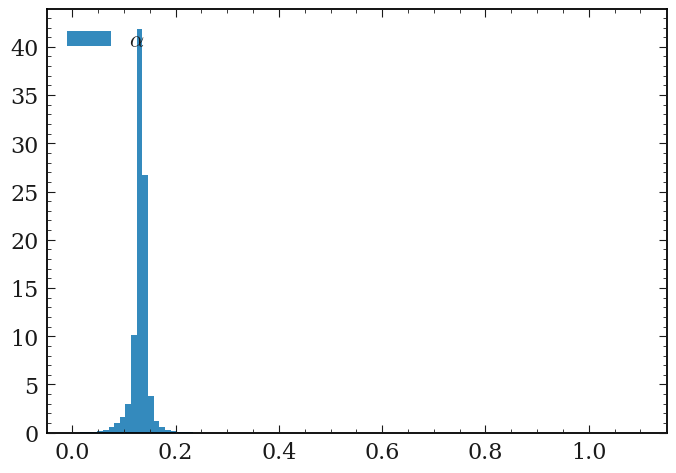

In [7]:
plt.hist(pi0_like_pd_df.M,bins=100,label=r'$\alpha$',density=True);
plt.legend(loc="upper left")

In [8]:
signal_pd_df.describe()

,isSignal,M,daughter__bo1__cmE__bc,cosHelicityAngleMomentum,daughter__bo1__cmclusterTheta__bc,daughter__bo1__cmclusterNHits__bc,daughter__bo1__cmclusterE9E21__bc,daughter__bo1__cmclusterZernikeMVA__bc
count,4705988.0,1.136666e+07,1.136666e+07,1.136666e+07,1.136666e+07,1.136666e+07,1.136666e+07,1.136666e+07
mean,0.0,5.316723e-01,1.396390e-01,-8.845029e-01,1.491907e+00,5.692903e+00,9.684694e-01,3.849626e-01
std,0.0,4.570427e-01,2.230343e-01,2.173534e-01,7.265214e-01,2.652526e+00,6.140939e-02,2.693346e-01
min,0.0,3.084650e-03,2.000010e-02,-1.000000e+00,2.263604e-01,2.148438e+00,5.761719e-02,3.906250e-03
25%,0.0,2.433153e-01,2.707867e-02,-9.858891e-01,8.606908e-01,3.906250e+00,9.648438e-01,1.347656e-01
50%,0.0,3.917463e-01,6.097061e-02,-9.628645e-01,1.433869e+00,5.078125e+00,1.000000e+00,3.554688e-01
75%,0.0,6.679502e-01,1.647168e-01,-8.887430e-01,2.162880e+00,7.031250e+00,1.000000e+00,6.103516e-01
max,0.0,8.019949e+00,6.321738e+00,9.999848e-01,2.682239e+00,2.207031e+01,1.000000e+00,9.707031e-01


## Draw plots


### pi0 veto

In [9]:
# type(xrange)

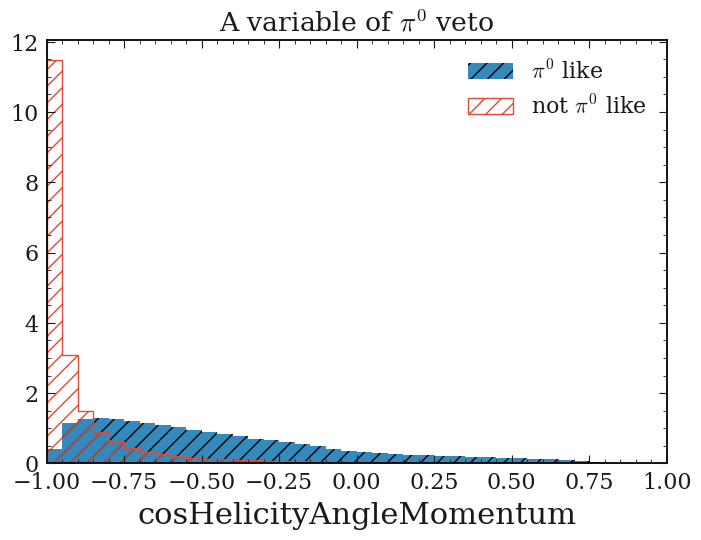

In [10]:
xrange = (-1,1,41)
xm = np.linspace(*xrange)

plt.hist(pi0_like_pd_df['cosHelicityAngleMomentum'], label='$\pi^0$ like',bins=xm,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(signal_pd_df['cosHelicityAngleMomentum'], label='not $\pi^0$ like',bins=xm,  histtype='step', density=True, hatch="//")

ax = plt.gca()
ax.set_xlim(-1,1)   
xlabel = 'cosHelicityAngleMomentum'
plot_title = r'A variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

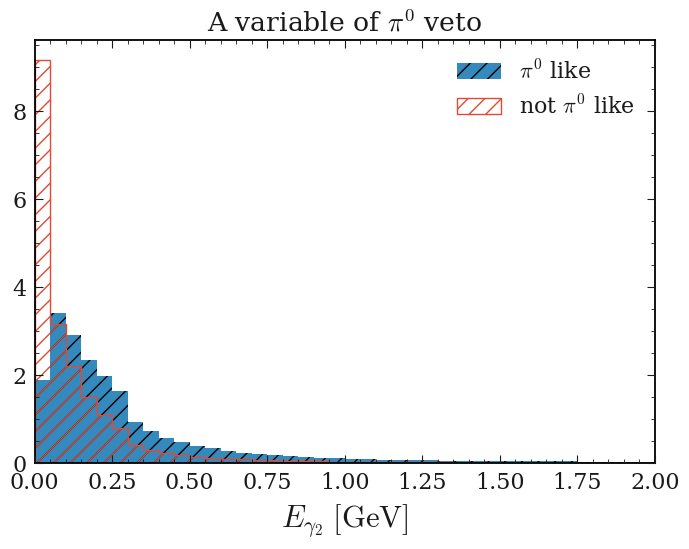

In [11]:
xrange = (0,2.0,41)
xm = np.linspace(*xrange)

plt.hist(pi0_like_pd_df['daughter__bo1__cmE__bc'], label='$\pi^0$ like',bins=xm,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(signal_pd_df['daughter__bo1__cmE__bc'], label='not $\pi^0$ like',bins=xm,  histtype='step', density=True, hatch="//")

ax = plt.gca()
ax.set_xlim(0,2.0)   
xlabel = '$E_{\gamma_2} \; [\mathrm{GeV}]$'
plot_title = r'A variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

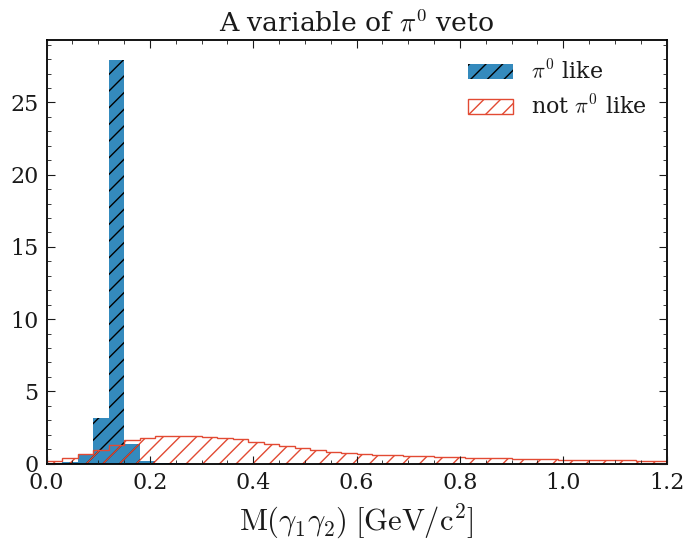

In [12]:
xrange = (0,1.2,41)
xm = np.linspace(*xrange)

plt.hist(pi0_like_pd_df['M'], label='$\pi^0$ like',bins=xm,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(signal_pd_df['M'], label='not $\pi^0$ like',bins=xm,  histtype='step', density=True, hatch="//")

ax = plt.gca()
ax.set_xlim(0,1.2)   
xlabel = '$\mathrm{M}(\gamma_1\gamma_2)\; [\mathrm{GeV/c^2}]$'
plot_title = r'A variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')



plt.legend(loc='upper right')

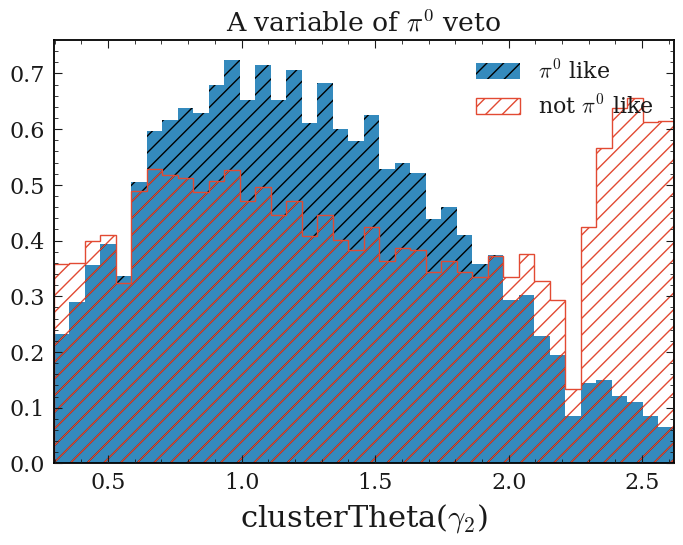

In [13]:
xrange = (0.2967,2.6180,41)
xm = np.linspace(*xrange)

plt.hist(pi0_like_pd_df['daughter__bo1__cmclusterTheta__bc'], label='$\pi^0$ like',bins=xm,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(signal_pd_df['daughter__bo1__cmclusterTheta__bc'], label='not $\pi^0$ like',bins=xm,  histtype='step', density=True, hatch="//")

ax = plt.gca()
ax.set_xlim(0.2967,2.6180)   
xlabel = r'clusterTheta($\gamma_2$)'
plot_title = r'A variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

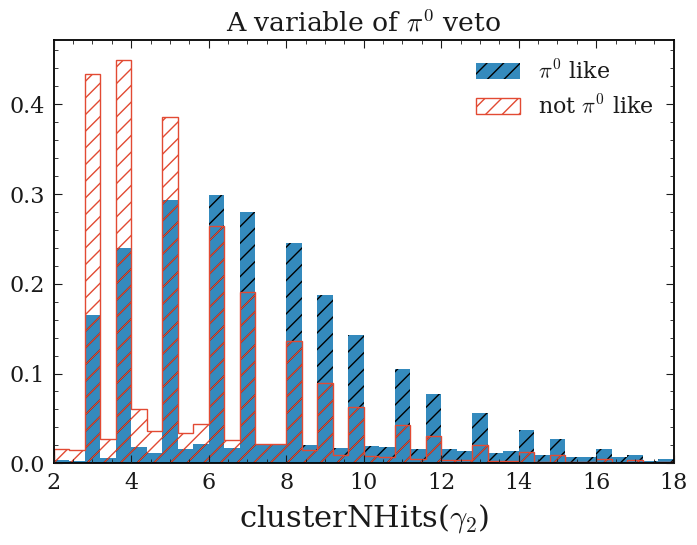

In [14]:
xrange = (2,18,41)
xm = np.linspace(*xrange)

plt.hist(pi0_like_pd_df['daughter__bo1__cmclusterNHits__bc'], label='$\pi^0$ like',bins=xm,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(signal_pd_df['daughter__bo1__cmclusterNHits__bc'], label='not $\pi^0$ like',bins=xm,  histtype='step', density=True, hatch="//")

ax = plt.gca()
ax.set_xlim(2,18)   
xlabel = r'clusterNHits($\gamma_2$)'
plot_title = r'A variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

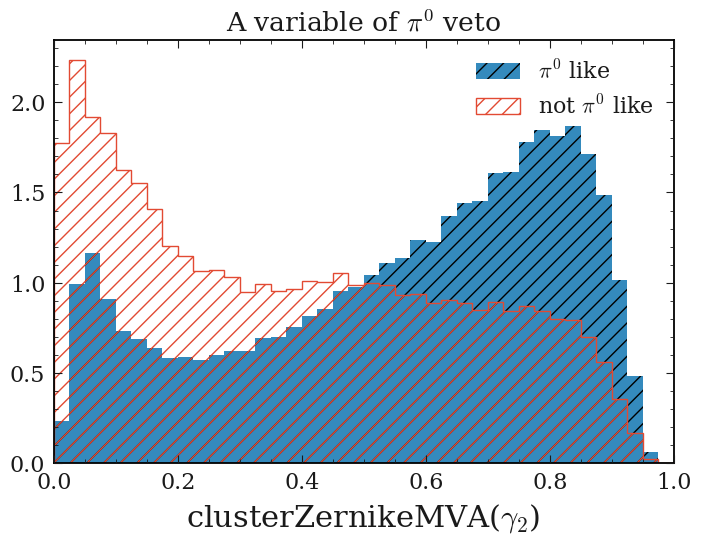

In [15]:
xrange = (0,1,41)
xm = np.linspace(*xrange)

plt.hist(pi0_like_pd_df['daughter__bo1__cmclusterZernikeMVA__bc'], label='$\pi^0$ like',bins=xm,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(signal_pd_df['daughter__bo1__cmclusterZernikeMVA__bc'], label='not $\pi^0$ like',bins=xm,  histtype='step', density=True, hatch="//")

ax = plt.gca()
ax.set_xlim(0,1)   
xlabel = r'clusterZernikeMVA($\gamma_2$)'
plot_title = r'A variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

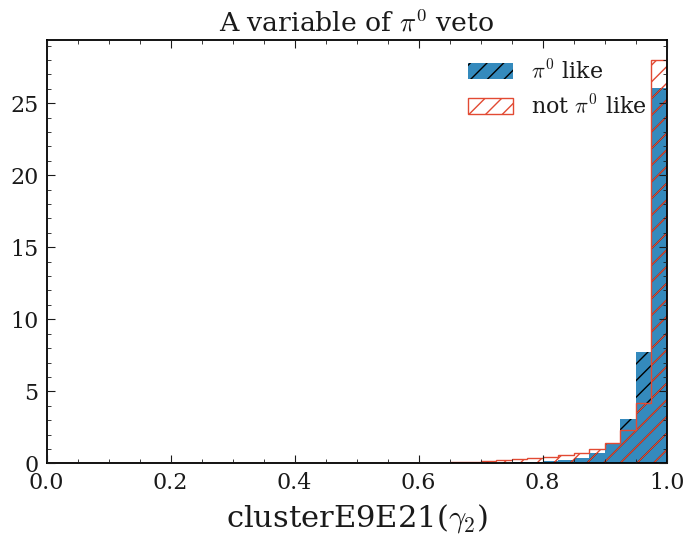

In [16]:
xrange = (0,1,41)
xm = np.linspace(*xrange)

plt.hist(pi0_like_pd_df['daughter__bo1__cmclusterE9E21__bc'], label='$\pi^0$ like',bins=xm,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(signal_pd_df['daughter__bo1__cmclusterE9E21__bc'], label='not $\pi^0$ like',bins=xm,  histtype='step', density=True, hatch="//")

ax = plt.gca()
ax.set_xlim(0,1)   
xlabel = r'clusterE9E21($\gamma_2$)'
plot_title = r'A variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

### eta veto

In [59]:
variables = ['M','daughter__bo1__cmE__bc','cosHelicityAngleMomentum','isSignal']

In [64]:
training_file = '/media/jykim/ssd_T5/storage/workspace/06_MVA/my_pi0etaveto/files_train/Dstar_grandmother/etaveto_train.root'

In [65]:
eta_like_filter = 'isSignal==1'
signal_filter    = 'isSignal!=1'

tree = 'eta'

In [66]:
del signal_pd_df

NameError: name 'signal_pd_df' is not defined

In [67]:
eta_like_pd_df = get_data(file=training_file , tree=tree, variables=variables ,base_filter=pi0_like_filter)
signal_pd_df   = get_data(file=training_file , tree=tree, variables=variables ,base_filter=signal_filter)

In [68]:
eta_like_pd_df.describe()

,M,daughter__bo1__cmE__bc,cosHelicityAngleMomentum,isSignal
count,983569.000000,983569.000000,983569.000000,983569.0
mean,0.529419,0.462986,-0.387271,1.0
std,0.051657,0.471214,0.463161,0.0
min,0.020658,0.030007,-0.999999,1.0
25%,0.521951,0.188239,-0.781757,1.0
50%,0.539635,0.285370,-0.497024,1.0
75%,0.552062,0.547453,-0.051545,1.0
max,1.365715,5.389148,0.985135,1.0


In [69]:
signal_pd_df.describe()

,M,daughter__bo1__cmE__bc,cosHelicityAngleMomentum,isSignal
count,982970.000000,982970.000000,982970.000000,576616.0
mean,0.591346,0.190430,-0.816873,0.0
std,0.449473,0.258868,0.271344,0.0
min,0.005570,0.030001,-1.000000,0.0
25%,0.298131,0.054965,-0.969529,0.0
50%,0.474070,0.112798,-0.918927,0.0
75%,0.749805,0.220282,-0.789687,0.0
max,6.802936,5.992063,0.999978,0.0


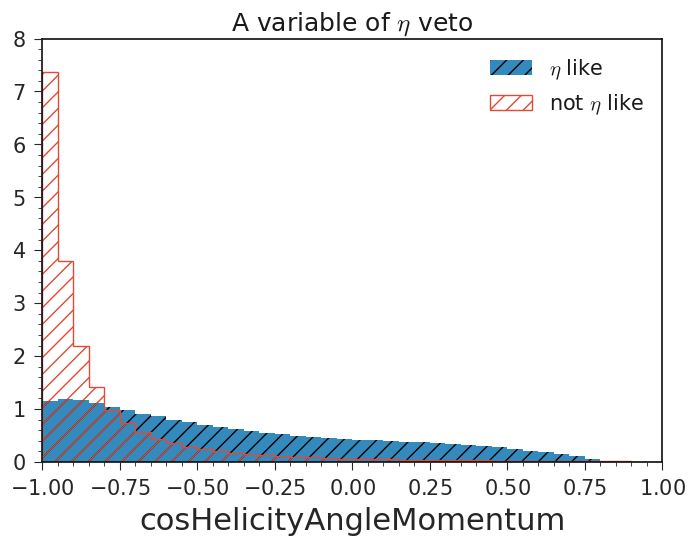

In [70]:
xrange = (-1,1,41)
xm = np.linspace(*xrange)

plt.hist(eta_like_pd_df['cosHelicityAngleMomentum'], label='$\eta$ like',bins=xm,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(signal_pd_df['cosHelicityAngleMomentum'], label='not $\eta$ like',bins=xm,  histtype='step', density=True, hatch="//")

ax = plt.gca()
ax.set_xlim(-1,1)   
xlabel = 'cosHelicityAngleMomentum'
plot_title = r'A variable of $\eta$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

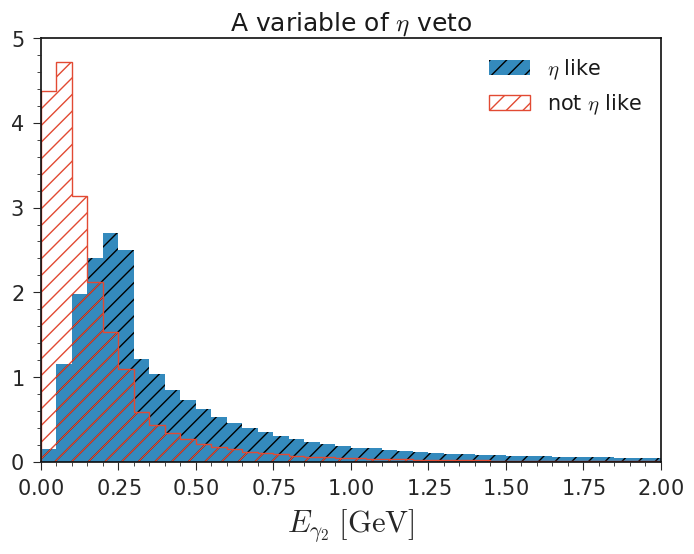

In [73]:
xrange = (0,2.0,41)
xm = np.linspace(*xrange)

plt.hist(eta_like_pd_df['daughter__bo1__cmE__bc'], label='$\eta$ like',bins=xm,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(signal_pd_df['daughter__bo1__cmE__bc'], label='not $\eta$ like',bins=xm,  histtype='step', density=True, hatch="//")

ax = plt.gca()
ax.set_xlim(0,2.0)   
xlabel = '$E_{\gamma_2} \; [\mathrm{GeV}]$'
plot_title = r'A variable of $\eta$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

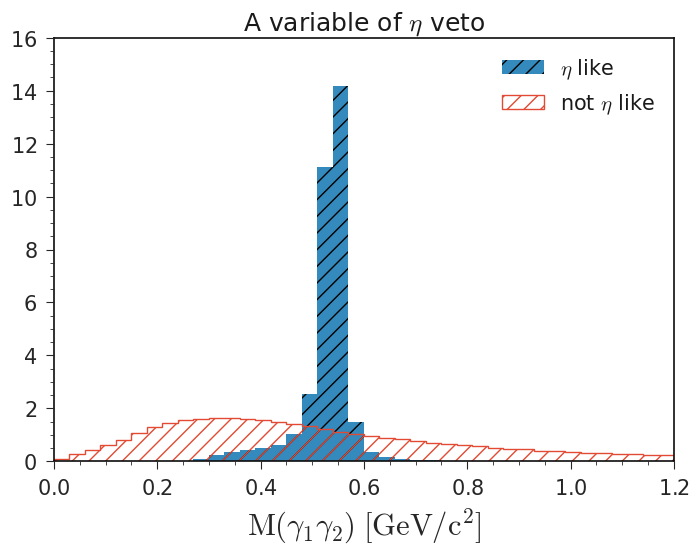

In [74]:
xrange = (0,1.2,41)
xm = np.linspace(*xrange)

plt.hist(eta_like_pd_df['M'], label='$\eta$ like',bins=xm,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(signal_pd_df['M'], label='not $\eta$ like',bins=xm,  histtype='step', density=True, hatch="//")

ax = plt.gca()
ax.set_xlim(0,1.2)   
xlabel = '$\mathrm{M}(\gamma_1\gamma_2)\; [\mathrm{GeV/c^2}]$'
plot_title = r'A variable of $\eta$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

In [20]:
import seaborn as sb
# training_file = '/media/jykim/ssd_T5/storage/workspace/06_MVA/my_pi0etaveto/files_train/Dstar_grandmother/pi0veto_train.root'
training_file = '/media/jykim/T7/storage/workspace/06_MVA/my_pi0etaveto/train_v2_new/pi0veto_train.root'

df = get_pd(file=training_file , tree='pi0', variables=variables ,base_filter='M > 0')
df = df.drop("isSignal", axis=1)
df = df.drop("daughter__bo1__cmclusterTheta__bc", axis=1)
df = df.drop("daughter__bo1__cmclusterNHits__bc", axis=1)
df = df.drop("daughter__bo1__cmclusterE9E21__bc", axis=1)
df = df.drop("daughter__bo1__cmclusterZernikeMVA__bc", axis=1)

<AxesSubplot:>

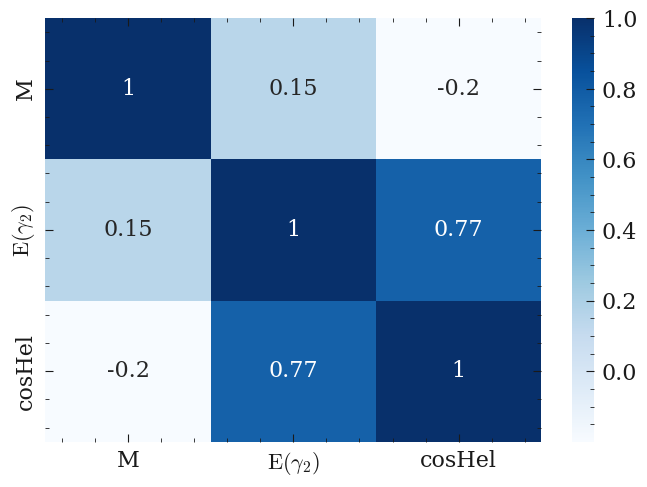

In [21]:
df.rename(columns = {'daughter__bo1__cmE__bc':r'$\mathrm{E}(\gamma_2)$','cosHelicityAngleMomentum':'cosHel'}, inplace = True)

corr = df.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

NameError: name 'y' is not defined

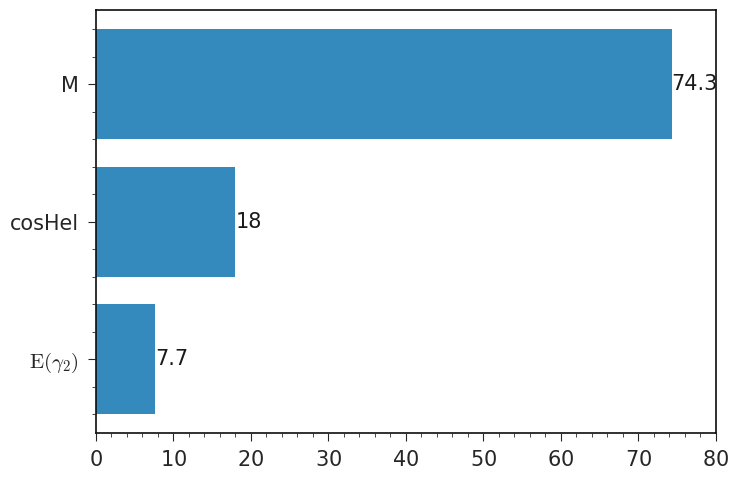

In [12]:
years = [r'$\mathrm{E}(\gamma_2)$', 'cosHel','M']
values = [7.7,18, 74.3]

fig, ax = plt.subplots()
bars = ax.barh(years, values)

ax.bar_label(bars)
plt.barh(y, values,color='gray')
plt.yticks(y, years)
plt.title('Feature Importance')
plt.show()

In [3]:
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])


NameError: name 'fi_df' is not defined

In [19]:
importance = {'M': [10], 'E': [20], 'cosHel': [30]}

In [21]:
fi_df = pd.DataFrame(data=importance)

In [22]:
fi_df

,M,E,cosHel
0,10,20,30


In [23]:
sns.barplot(x=fi_df['feature_importance'], y=fi_df.columns())


KeyError: 'feature_importance'

In [8]:
df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                   columns=['a', 'b', 'c'])

In [16]:
importance=np.array([[1, 2, 3],[2],[2]])

/tmp/ipykernel_4927/3705849855.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  importance=np.array([[1, 2, 3],[2],[2]])


In [4]:
file='/media/jykim/ssd_T5/storage/01_recon/antiKstar/massveto_E_0_5_signalMC_recon_mdst_antiKstar.root'
file='/media/jykim/ssd_T5/storage/01_recon/antiKstar/massveto_signalMC_recon_mdst_antiKstar.root'

base_filter = 'Dstarp_isSignal==1'

tree = 'antiKstar'

variables=['ROE_Pi0_InvM','ROE_Pi0_InvM_50MeV','ROE_Pi0_InvM_75MeV','ROE_Pi0_InvM_100MeV','ROE_Pi0_InvM_125MeV','ROE_Pi0_InvM_150MeV']
variables+= ['ROE_Eta_InvM','ROE_Eta_InvM_50MeV','ROE_Eta_InvM_75MeV','ROE_Eta_InvM_100MeV','ROE_Eta_InvM_125MeV','ROE_Eta_InvM_150MeV','ROE_Eta_InvM_175MeV','ROE_Eta_InvM_200MeV']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

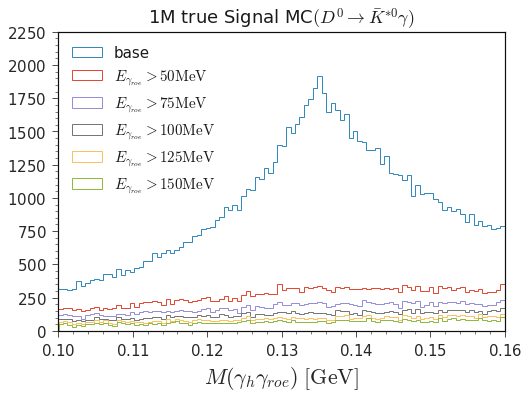

In [5]:
plt.hist(pd_df[(pd_df['ROE_Pi0_InvM']<0.16) & (pd_df['ROE_Pi0_InvM']>0.1)].ROE_Pi0_InvM, label=r'base',bins=100,  histtype='step')

plt.hist(pd_df[(pd_df['ROE_Pi0_InvM_50MeV']<0.16) & (pd_df['ROE_Pi0_InvM_50MeV']>0.1) ].ROE_Pi0_InvM_50MeV, label=r'$E_{\gamma_{roe}}>50\mathrm{MeV}$',bins=100,histtype='step')

plt.hist(pd_df[(pd_df['ROE_Pi0_InvM_75MeV']<0.16) & (pd_df['ROE_Pi0_InvM_75MeV']>0.1)].ROE_Pi0_InvM_75MeV, label=r'$E_{\gamma_{roe}}>75\mathrm{MeV}$',bins=100,histtype='step')

plt.hist(pd_df[(pd_df['ROE_Pi0_InvM_100MeV']<0.16) & (pd_df['ROE_Pi0_InvM_100MeV']>0.1)].ROE_Pi0_InvM_100MeV, label=r'$E_{\gamma_{roe}}>100\mathrm{MeV}$',bins=100,histtype='step')

plt.hist(pd_df[(pd_df['ROE_Pi0_InvM_125MeV']<0.16) & (pd_df['ROE_Pi0_InvM_125MeV']>0.1)].ROE_Pi0_InvM_125MeV, label=r'$E_{\gamma_{roe}}>125\mathrm{MeV}$',bins=100,histtype='step')

plt.hist(pd_df[(pd_df['ROE_Pi0_InvM_150MeV']<0.16) & (pd_df['ROE_Pi0_InvM_150MeV']>0.1)].ROE_Pi0_InvM_150MeV, label=r'$E_{\gamma_{roe}}>150\mathrm{MeV}$',bins=100,histtype='step')

plot_title = r'1M true Signal MC$(D^0 \rightarrow \bar{K}^{*0} \gamma)$'
xlabel = r'$M(\gamma_h \gamma_{roe}) \; [\mathrm{GeV}]$'
ax = plt.gca()
ax.set_xlim(0.10,0.16)
ax.set_xlabel(xlabel)
plt.title(plot_title)

plt.legend(loc='upper left')

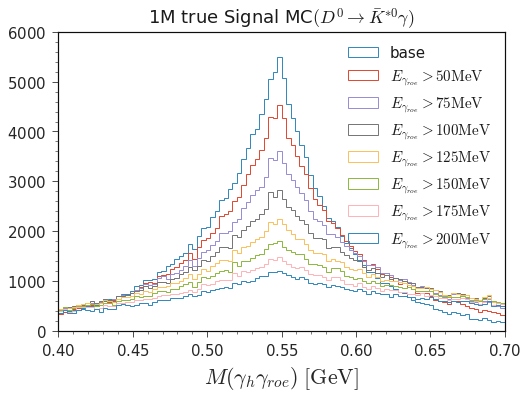

In [6]:
plt.hist(pd_df[(pd_df['ROE_Eta_InvM']<0.7) & (pd_df['ROE_Eta_InvM']>0.4)].ROE_Eta_InvM, label=r'base',bins=100,  histtype='step')

plt.hist(pd_df[(pd_df['ROE_Eta_InvM_50MeV']<0.7) & (pd_df['ROE_Eta_InvM_50MeV']>0.4) ].ROE_Eta_InvM_50MeV, label=r'$E_{\gamma_{roe}}>50\mathrm{MeV}$',bins=100,histtype='step')

plt.hist(pd_df[(pd_df['ROE_Eta_InvM_75MeV']<0.7) & (pd_df['ROE_Eta_InvM_75MeV']>0.4)].ROE_Eta_InvM_75MeV, label=r'$E_{\gamma_{roe}}>75\mathrm{MeV}$',bins=100,histtype='step')

plt.hist(pd_df[(pd_df['ROE_Eta_InvM_100MeV']<0.7) & (pd_df['ROE_Eta_InvM_100MeV']>0.4)].ROE_Eta_InvM_100MeV, label=r'$E_{\gamma_{roe}}>100\mathrm{MeV}$',bins=100,histtype='step')

plt.hist(pd_df[(pd_df['ROE_Eta_InvM_125MeV']<0.7) & (pd_df['ROE_Eta_InvM_125MeV']>0.4)].ROE_Eta_InvM_125MeV, label=r'$E_{\gamma_{roe}}>125\mathrm{MeV}$',bins=100,histtype='step')

plt.hist(pd_df[(pd_df['ROE_Eta_InvM_150MeV']<0.7) & (pd_df['ROE_Eta_InvM_150MeV']>0.4)].ROE_Eta_InvM_150MeV, label=r'$E_{\gamma_{roe}}>150\mathrm{MeV}$',bins=100,histtype='step')

plt.hist(pd_df[(pd_df['ROE_Eta_InvM_175MeV']<0.7) & (pd_df['ROE_Eta_InvM_175MeV']>0.4)].ROE_Eta_InvM_175MeV, label=r'$E_{\gamma_{roe}}>175\mathrm{MeV}$',bins=100,histtype='step')

plt.hist(pd_df[(pd_df['ROE_Eta_InvM_200MeV']<0.7) & (pd_df['ROE_Eta_InvM_200MeV']>0.4)].ROE_Eta_InvM_200MeV, label=r'$E_{\gamma_{roe}}>200\mathrm{MeV}$',bins=100,histtype='step')


plot_title = r'1M true Signal MC$(D^0 \rightarrow \bar{K}^{*0} \gamma)$'
xlabel = r'$M(\gamma_h \gamma_{roe}) \; [\mathrm{GeV}]$'
ax = plt.gca()
ax.set_xlim(0.40,0.7)
ax.set_xlabel(xlabel)
plt.title(plot_title)

plt.legend(loc='upper right')

In [4]:
Filter = {}
Filter['rho']= ' gamma_E>0.3 && gamma_clusterSecondMoment<=1.5 && (D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && ( abs(Rho_M- 0.77526) < 0.150 )&& Dstarp_CMS_p>2.72 && abs(Dstarp_Q-0.00593)<0.0006'
Filter['omega'] = 'gamma_E>0.3 && gamma_clusterSecondMoment<=1.5 && (D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && ( abs(Omega_M- 0.78265) < 0.015 ) && Dstarp_CMS_p>2.7 && abs(Dstarp_Q-0.00593)<0.0006 '
Filter['phi'] = 'gamma_E>0.3 && gamma_clusterSecondMoment<=1.5 && (D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && ( abs(Phi_M- 1.0195) < 0.011 ) && Dstarp_CMS_p>2.42 && abs(Dstarp_Q-0.00593)<0.0006'
Filter['antiKstar']='gamma_E>0.3 && gamma_clusterSecondMoment<=1.5 && (D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && ( abs(antiKstar_M- 0.89555) < 0.06 )&& Dstarp_CMS_p>2.17 && abs(Dstarp_Q-0.00593)<0.0006'

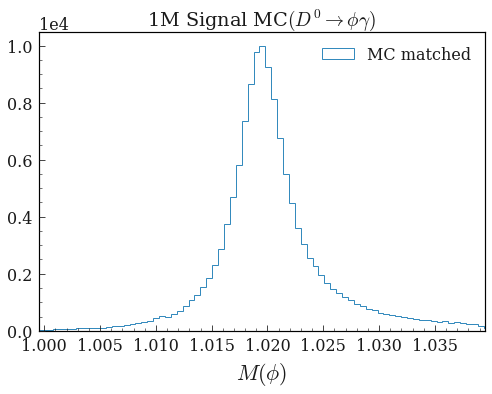

input_line_79:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<double>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [6]:
file='/group/belle/users/jaeyoung/storage/01_recon/phi/pid_0_5_signalMC_recon_mdst_phi.root'
base_filter='Dstarp_isSignal==1'
tree='phi'
variables=['Phi_InvM']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)
plt.hist(pd_df['Phi_InvM'], label=r'MC matched',bins=100,  histtype='step') 

ax = plt.gca()
ax.set_xlim(0.9995,1.0395)   
xlabel = r'$M(\phi)$'
plot_title = r'1M Signal MC$(D^0 \rightarrow \phi \gamma)$'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

In [2]:
file='/home/belle2/jaeyoung/workspace/06_MVA/my_pi0etaveto/train_files/pi0veto_train.root'
file='/media/jykim/ssd_T5/storage/workspace/06_MVA/my_pi0etaveto/files_train/pi0veto_train.root'



#file='/group/belle/users/jaeyoung/storage/pi0etaveto/frac_0_3/merged_frac_0_3/pi0etaveto_all_generic_recon_output.root'
file2='/group/belle/users/jaeyoung/storage/pi0etaveto/signal/frac_0_5_a/half_1M_0_recon_mdst_all.root'
file2='/media/jykim/ssd_T5/storage/pi0etaveto/signal/frac_0_5_a/half_1M_0_recon_mdst_all.root'



#base_filter='isSignal==1 && M<0.4'
#base_filter2='isSignal!=1 && M<0.4'
base_filter='isSignal==1'
base_filter2='isSignal!=1 && daughter__bo0__cmgenMotherPDG__bc==421'
base_filter2='isSignal!=1'

tree='pi0'
variables=['M','cosHelicityAngleMomentum','daughter__bo1__cmE__bc','daughter__bo1__cmclusterTheta__bc','daughter__bo1__cmclusterNHits__bc','daughter__bo1__cmclusterSecondMoment__bc',\
           'daughter__bo1__cmclusterE9E21__bc','daughter__bo1__cmminC2TDist__bc','daughter__bo1__cmclusterZernikeMVA__bc','daughter__bo0__cmE__bc','daughter__bo0__cmgenMotherID__bc','hardPhotonECMS']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)
pd_df1 = get_data(file=file2, tree=tree,variables=variables ,base_filter=base_filter2)


In [3]:
plot_bins = np.arange(-1, 1, 0.05)
len(plot_bins)

40

In [4]:
file='/home/jykim/workspace/recon_output_ccbar_1733.root'
tree='pi0'
base_filter='isSignal==1'
variables=['M','cosHelicityAngleMomentum','daughter__bo1__cmE__bc','daughter__bo1__cmclusterTheta__bc','daughter__bo1__cmclusterNHits__bc','daughter__bo1__cmclusterSecondMoment__bc',\
           'daughter__bo1__cmclusterE9E21__bc','daughter__bo1__cmminC2TDist__bc','daughter__bo1__cmclusterZernikeMVA__bc','daughter__bo0__cmE__bc','daughter__bo0__cmgenMotherID__bc','hardPhotonECMS']

pi0_study_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

In [11]:
x_plot_bins = np.arange(0, 1.02, 0.02)
y_plot_bins = np.arange(0, 1.02, 0.02)

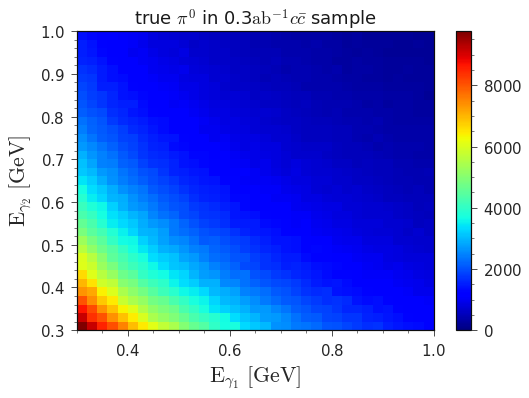

In [19]:
x=pi0_study_df[(pi0_study_df['daughter__bo0__cmE__bc']<1) & (pi0_study_df['daughter__bo1__cmE__bc']<1)]['daughter__bo0__cmE__bc']
y=pi0_study_df[(pi0_study_df['daughter__bo0__cmE__bc']<1) & (pi0_study_df['daughter__bo1__cmE__bc']<1)]['daughter__bo1__cmE__bc']


plt.hist2d(x, y, bins=(x_plot_bins,y_plot_bins), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

plot_title = r'true $\pi^0$ in 0.3$\mathrm{ab}^{-1} c\bar{c}$ sample'
#plot_title=r"$\mathrm{E}_{\gamma_1} , \mathrm{E}_{\gamma_2}$"
plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\mathrm{E}_{\gamma_1}\;[\mathrm{GeV}]$"
ylabel = r"$\mathrm{E}_{\gamma_2}\;[\mathrm{GeV}]$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax = plt.gca()
ax.set_xlim(0.3,1) 
ax.set_ylim(0.3,1) 
#ax.set_xlim(x.min(), x.max())
#ax.set_ylim(y.min(), y.max())

plt.colorbar()
plt.show()

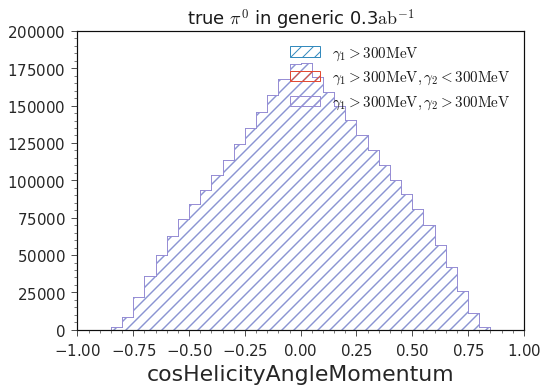

In [13]:
# plot_bins = [*range(-1,1,0.01)]
plot_bins = np.arange(-1, 1, 0.05)

plt.hist(pi0_study_df['cosHelicityAngleMomentum'], label=r'$\gamma_1>300\mathrm{MeV}$',bins=plot_bins,  histtype='step', density=False, hatch="//") 
plt.hist(pi0_study_df[pi0_study_df['daughter__bo1__cmE__bc']<0.3]['cosHelicityAngleMomentum'], label=r'$\gamma_1>300\mathrm{MeV},\gamma_2<300\mathrm{MeV}$',bins=plot_bins,  histtype='step', density=False, hatch="//") 
plt.hist(pi0_study_df[pi0_study_df['daughter__bo1__cmE__bc']>0.3]['cosHelicityAngleMomentum'], label=r'$\gamma_1>300\mathrm{MeV},\gamma_2>300\mathrm{MeV}$',bins=plot_bins,  histtype='step', density=False, hatch="//") 

# plt.hist(pd_df1['cosHelicityAngleMomentum'], label=r'not $\pi^0$ like',bins=50,  histtype='step', density=True, hatch="//")

ax = plt.gca()
#ax.set_xlim(0,0.4)   
xlabel = r'cosHelicityAngleMomentum'
plot_title = r'true $\pi^0$ in generic 0.3$\mathrm{ab}^{-1}$'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
ax = plt.gca()
ax.set_xlim(-1,1)  
plt.legend(loc='upper right')

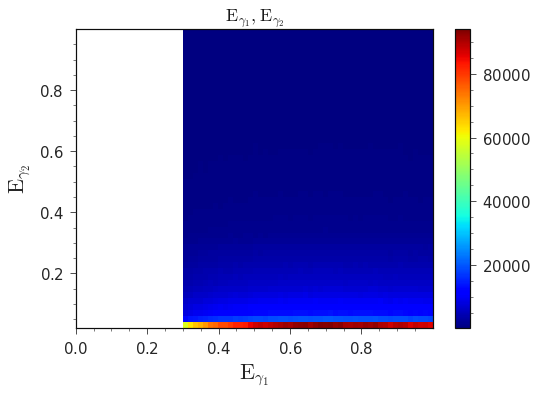

In [3]:
x=pd_df1[(pd_df1['daughter__bo0__cmE__bc']<1) & (pd_df1['daughter__bo1__cmE__bc']<1)]['daughter__bo0__cmE__bc']
y=pd_df1[(pd_df1['daughter__bo0__cmE__bc']<1) & (pd_df1['daughter__bo1__cmE__bc']<1)]['daughter__bo1__cmE__bc']


plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

plot_title=r"$\mathrm{E}_{\gamma_1} , \mathrm{E}_{\gamma_2}$"
plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\mathrm{E}_{\gamma_1}$"
ylabel = r"$\mathrm{E}_{\gamma_2}$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax = plt.gca()
ax.set_xlim(0,) 
#ax.set_xlim(x.min(), x.max())
#ax.set_ylim(y.min(), y.max())

plt.colorbar()
plt.show()

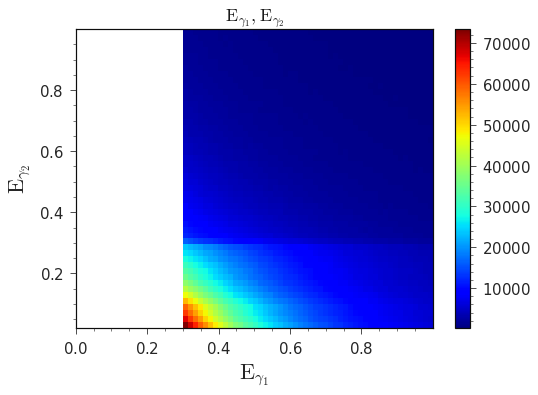

In [18]:
x=pd_df[(pd_df['daughter__bo0__cmE__bc']<1) & (pd_df['daughter__bo1__cmE__bc']<1)]['daughter__bo0__cmE__bc']
y=pd_df[(pd_df['daughter__bo0__cmE__bc']<1) & (pd_df['daughter__bo1__cmE__bc']<1)]['daughter__bo1__cmE__bc']


plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.jet)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

plot_title=r"$\mathrm{E}_{\gamma_1} , \mathrm{E}_{\gamma_2}$"
plt.title(plot_title)
ax = plt.gca()
xlabel = r"$\mathrm{E}_{\gamma_1}$"
ylabel = r"$\mathrm{E}_{\gamma_2}$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax = plt.gca()
ax.set_xlim(0,) 
#ax.set_xlim(x.min(), x.max())
#ax.set_ylim(y.min(), y.max())

plt.colorbar()
plt.show()

In [ ]:
#plt.hist(pd_df['cosHelicityAngleMomentum'], label=r'$\pi^0$ like',bins=plot_bins,  histtype='step', density=False, hatch="//") 
plt.hist(pd_df[pd_df['daughter__bo1__cmE__bc']<0.3]['cosHelicityAngleMomentum'], label=r'$\pi^0$ like, $E_{\gamma_2}<300\mathrm{MeV}$',bins=plot_bins,  histtype='step', density=False, hatch="//") 
plt.hist(pd_df[pd_df['daughter__bo1__cmE__bc']>0.3]['cosHelicityAngleMomentum'], label=r'$\pi^0$ like, $E_{\gamma_2}>300\mathrm{MeV}$',bins=plot_bins,  histtype='step', density=False, hatch="//") 

# plt.hist(pd_df1['cosHelicityAngleMomentum'], label=r'not $\pi^0$ like',bins=50,  histtype='step', density=True, hatch="//")

ax = plt.gca()
#ax.set_xlim(0,0.4)   
xlabel = r'cosHelicityAngleMomentum'
plot_title = r'variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
ax = plt.gca()
ax.set_xlim(-1,1)  
plt.legend(loc='upper right')

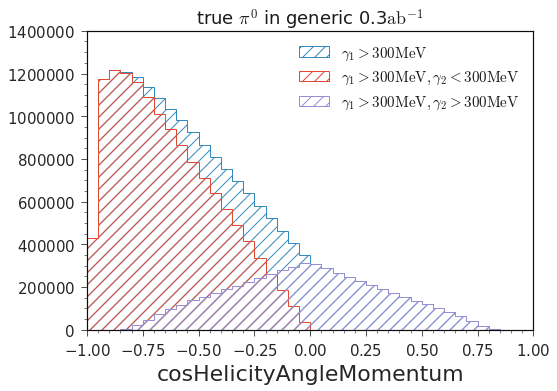

In [11]:
# plot_bins = [*range(-1,1,0.01)]
plot_bins = np.arange(-1, 1, 0.05)

plt.hist(pd_df['cosHelicityAngleMomentum'], label=r'$\gamma_1>300\mathrm{MeV}$',bins=plot_bins,  histtype='step', density=False, hatch="//") 
plt.hist(pd_df[pd_df['daughter__bo1__cmE__bc']<0.3]['cosHelicityAngleMomentum'], label=r'$\gamma_1>300\mathrm{MeV},\gamma_2<300\mathrm{MeV}$',bins=plot_bins,  histtype='step', density=False, hatch="//") 
plt.hist(pd_df[pd_df['daughter__bo1__cmE__bc']>0.3]['cosHelicityAngleMomentum'], label=r'$\gamma_1>300\mathrm{MeV},\gamma_2>300\mathrm{MeV}$',bins=plot_bins,  histtype='step', density=False, hatch="//") 

# plt.hist(pd_df1['cosHelicityAngleMomentum'], label=r'not $\pi^0$ like',bins=50,  histtype='step', density=True, hatch="//")

ax = plt.gca()
#ax.set_xlim(0,0.4)   
xlabel = r'cosHelicityAngleMomentum'
plot_title = r'true $\pi^0$ in generic 0.3$\mathrm{ab}^{-1}$'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
ax = plt.gca()
ax.set_xlim(-1,1)  
plt.legend(loc='upper right')

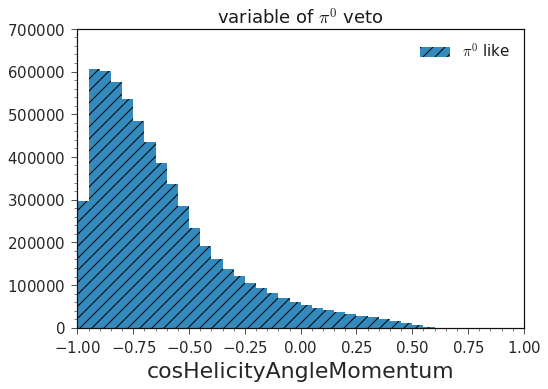

In [50]:
plt.hist(pd_df[pd_df['hardPhotonECMS']>0.7]['cosHelicityAngleMomentum'], label=r'$\pi^0$ like',bins=plot_bins,  histtype='stepfilled', density=False, hatch="//") 
# plt.hist(pd_df1['cosHelicityAngleMomentum'], label=r'not $\pi^0$ like',bins=50,  histtype='step', density=True, hatch="//")

ax = plt.gca()
#ax.set_xlim(0,0.4)   
xlabel = r'cosHelicityAngleMomentum'
plot_title = r'variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
ax = plt.gca()
ax.set_xlim(-1,1)  
plt.legend(loc='upper right')

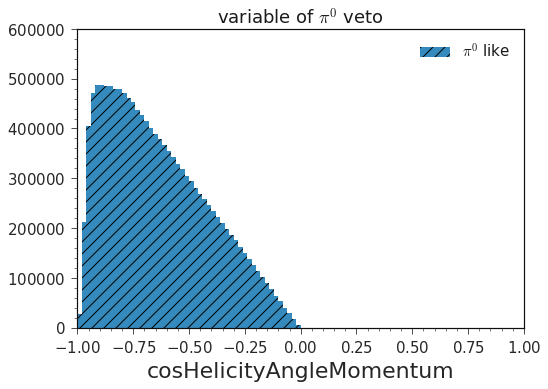

In [15]:
plt.hist(pd_df[pd_df['daughter__bo1__cmE__bc']<0.3]['cosHelicityAngleMomentum'], label=r'$\pi^0$ like',bins=plot_bins,  histtype='stepfilled', density=False, hatch="//") 
# plt.hist(pd_df1['cosHelicityAngleMomentum'], label=r'not $\pi^0$ like',bins=50,  histtype='step', density=True, hatch="//")

ax = plt.gca()
#ax.set_xlim(0,0.4)   
xlabel = r'cosHelicityAngleMomentum'
plot_title = r'variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
ax = plt.gca()
ax.set_xlim(-1,1)  
plt.legend(loc='upper right')

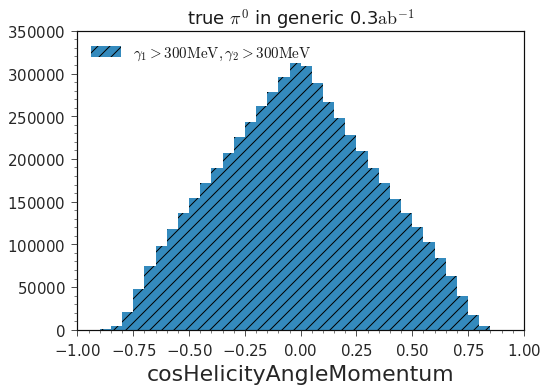

In [58]:
plt.hist(pd_df[pd_df['daughter__bo1__cmE__bc']>0.3 ]['cosHelicityAngleMomentum'], label=r'$\gamma_1>300\mathrm{MeV},\gamma_2>300\mathrm{MeV}$',bins=plot_bins,  histtype='stepfilled', density=False, hatch="//") 
# plt.hist(pd_df1['cosHelicityAngleMomentum'], label=r'not $\pi^0$ like',bins=50,  histtype='step', density=True, hatch="//")

ax = plt.gca()
#ax.set_xlim(0,0.4)   
xlabel = r'cosHelicityAngleMomentum'
plot_title = r'true $\pi^0$ in generic 0.3$\mathrm{ab}^{-1}$'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
ax = plt.gca()
ax.set_xlim(-1,1)  
plt.legend(loc='upper left')

In [31]:
g1_E=pd_df[pd_df['daughter__bo1__cmE__bc']>0.3 ]['daughter__bo0__cmE__bc']
g2_E=pd_df[pd_df['daughter__bo1__cmE__bc']>0.3 ]['daughter__bo1__cmE__bc']

#df=pd.Dataframe(data = g2_E/g1_E)


In [23]:
def ratio(row):

    
    ratio = row['daughter__bo1__cmE__bc']/row['daughter__bo0__cmE__bc']
    
    return ratio

In [24]:
def E0_E1(row):

    
    difference = row['daughter__bo0__cmE__bc']-row['daughter__bo1__cmE__bc']
    
    return difference

In [25]:
df = pi0_study_df 

In [26]:


#df = pd_df[pd_df['daughter__bo1__cmE__bc']>0.3 ]


df['ratio'] = df.apply(lambda row: ratio(row), axis=1)

In [27]:
df['E0_E1'] = df.apply(lambda row: E0_E1(row), axis=1)

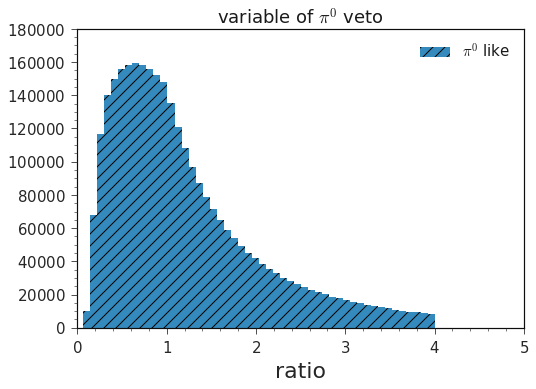

In [30]:
plt.hist(df[df['ratio']<4]['ratio'], label=r'$\pi^0$ like',bins=50,  histtype='stepfilled', density=False, hatch="//") 
# plt.hist(pd_df1['cosHelicityAngleMomentum'], label=r'not $\pi^0$ like',bins=50,  histtype='step', density=True, hatch="//")

ax = plt.gca()
#ax.set_xlim(0,1)   
xlabel = r'ratio'
plot_title = r'variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
ax = plt.gca()
ax.set_xlim(0,)  
plt.legend(loc='upper right')

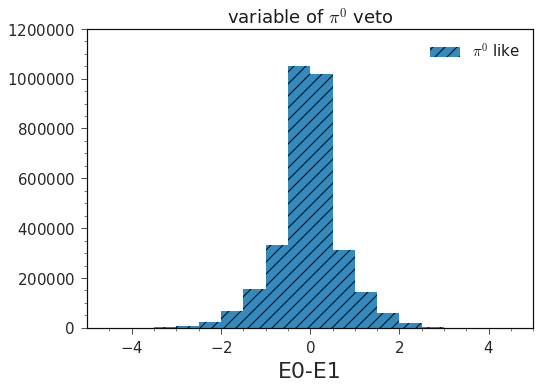

In [35]:
plt.hist(df[(df['daughter__bo1__cmclusterE9E21__bc']>=0.95) & (df['daughter__bo1__cmclusterSecondMoment__bc']<=1.5) & (df['daughter__bo1__cmclusterNHits__bc']>=5) ]['E0_E1'], label=r'$\pi^0$ like',bins=np.arange(-4, 4.5, 0.5),  histtype='stepfilled', density=False, hatch="//") 
# plt.hist(pd_df1['cosHelicityAngleMomentum'], label=r'not $\pi^0$ like',bins=50,  histtype='step', density=True, hatch="//")

ax = plt.gca()
ax.set_xlim(-5,5)   
xlabel = r'E0-E1'
plot_title = r'variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
ax = plt.gca()
#ax.set_xlim(0,)  
plt.legend(loc='upper right')

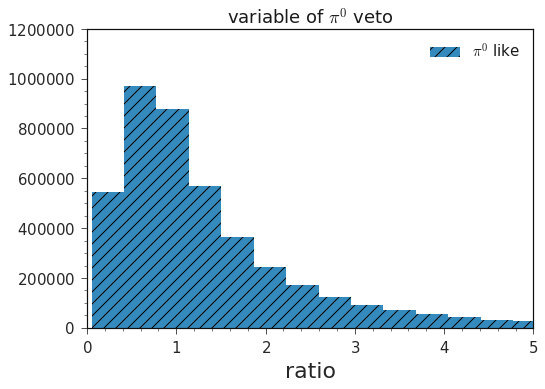

In [10]:
plt.hist(df[(df['daughter__bo1__cmclusterE9E21__bc']>=0.95) & (df['daughter__bo1__cmclusterSecondMoment__bc']<=1.5) & (df['daughter__bo1__cmclusterNHits__bc']>=5) ]['ratio'], label=r'$\pi^0$ like',bins=50,  histtype='stepfilled', density=False, hatch="//") 
# plt.hist(pd_df1['cosHelicityAngleMomentum'], label=r'not $\pi^0$ like',bins=50,  histtype='step', density=True, hatch="//")

ax = plt.gca()
ax.set_xlim(0,5)   
xlabel = r'ratio'
plot_title = r'variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
ax = plt.gca()
ax.set_xlim(0,)  
plt.legend(loc='upper right')

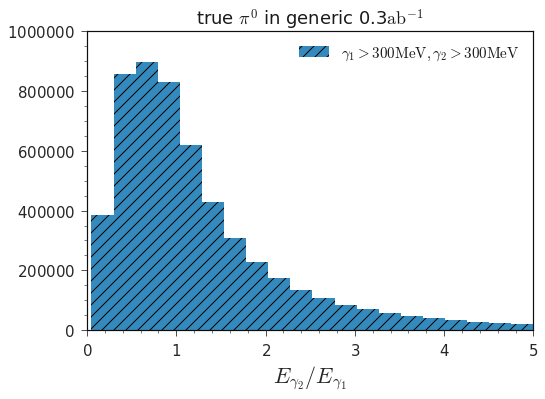

In [7]:
plt.hist(df[df['ratio']<5]['ratio'], label=r'$\gamma_1>300\mathrm{MeV},\gamma_2>300\mathrm{MeV}$',bins=20,  histtype='stepfilled', density=False, hatch="//") 
# plt.hist(pd_df1['cosHelicityAngleMomentum'], label=r'not $\pi^0$ like',bins=50,  histtype='step', density=True, hatch="//")

ax = plt.gca()
#ax.set_xlim(0,1)   
xlabel = r'$E_{\gamma_2}/E_{\gamma_1}$'
plot_title = r'true $\pi^0$ in generic 0.3$\mathrm{ab}^{-1}$'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
ax = plt.gca()
ax.set_xlim(0,5) 
plt.legend(loc='upper right')

In [ ]:
plt.hist(pd_df[pd_df['daughter__bo1__cmE__bc']>0.3 ]['daughter__bo1__cmE__bc'], label=r'$\pi^0$ like',bins=plot_bins,  histtype='stepfilled', density=False, hatch="//") 
# plt.hist(pd_df1['cosHelicityAngleMomentum'], label=r'not $\pi^0$ like',bins=50,  histtype='step', density=True, hatch="//")

ax = plt.gca()
#ax.set_xlim(0,0.4)   
xlabel = r'cosHelicityAngleMomentum'
plot_title = r'variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
ax = plt.gca()
ax.set_xlim(-1,1)  
plt.legend(loc='upper right')

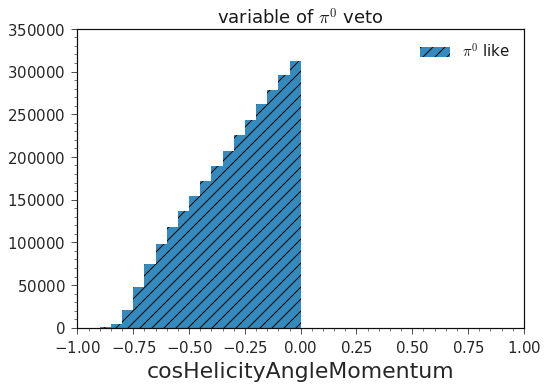

In [29]:
plt.hist(pd_df[(pd_df['daughter__bo1__cmE__bc']>0.3 ) & (pd_df['daughter__bo0__cmE__bc']>pd_df['daughter__bo1__cmE__bc']) ]['cosHelicityAngleMomentum'], label=r'$\pi^0$ like',bins=plot_bins,  histtype='stepfilled', density=False, hatch="//") 
# plt.hist(pd_df1['cosHelicityAngleMomentum'], label=r'not $\pi^0$ like',bins=50,  histtype='step', density=True, hatch="//")

ax = plt.gca()
#ax.set_xlim(0,0.4)   
xlabel = r'cosHelicityAngleMomentum'
#plot_title = r'variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
ax = plt.gca()
ax.set_xlim(-1,1)  
plt.legend(loc='upper right')

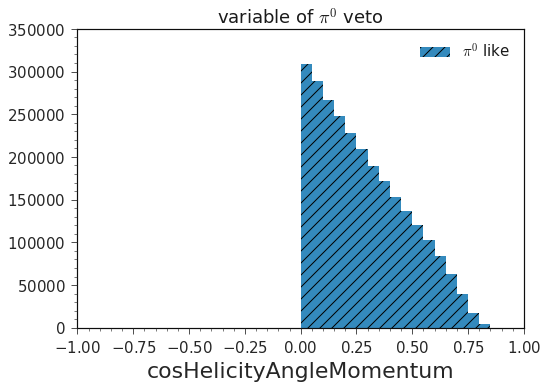

In [37]:
plt.hist(pd_df[(pd_df['daughter__bo1__cmE__bc']>0.3 ) & (pd_df['daughter__bo0__cmE__bc']<pd_df['daughter__bo1__cmE__bc']) ]['cosHelicityAngleMomentum'], label=r'$\pi^0$ like',bins=plot_bins,  histtype='stepfilled', density=False, hatch="//") 
# plt.hist(pd_df1['cosHelicityAngleMomentum'], label=r'not $\pi^0$ like',bins=50,  histtype='step', density=True, hatch="//")

ax = plt.gca()
#ax.set_xlim(0,0.4)   
xlabel = r'cosHelicityAngleMomentum'
plot_title = r'variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
ax = plt.gca()
ax.set_xlim(-1,1)  
plt.legend(loc='upper right')

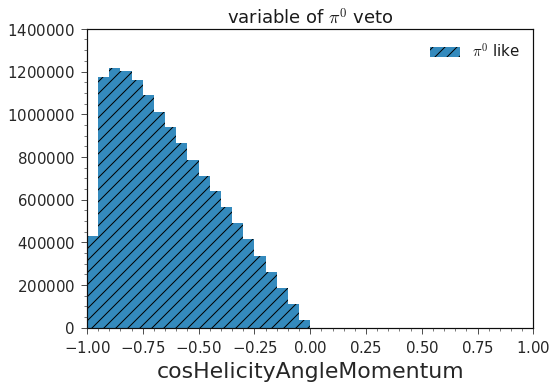

In [30]:
plt.hist(pd_df[(pd_df['daughter__bo1__cmE__bc']<0.3 ) & (pd_df['daughter__bo0__cmE__bc']>pd_df['daughter__bo1__cmE__bc']) ]['cosHelicityAngleMomentum'], label=r'$\pi^0$ like',bins=plot_bins,  histtype='stepfilled', density=False, hatch="//") 
# plt.hist(pd_df1['cosHelicityAngleMomentum'], label=r'not $\pi^0$ like',bins=50,  histtype='step', density=True, hatch="//")

ax = plt.gca()
#ax.set_xlim(0,0.4)   
xlabel = r'cosHelicityAngleMomentum'
plot_title = r'variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
ax = plt.gca()
ax.set_xlim(-1,1)  
plt.legend(loc='upper right')

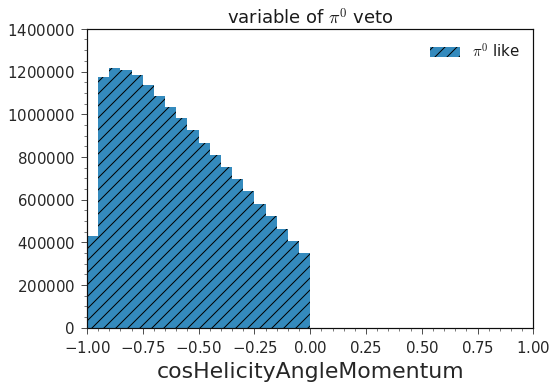

In [31]:
plt.hist(pd_df[ (pd_df['daughter__bo0__cmE__bc']>pd_df['daughter__bo1__cmE__bc']) ]['cosHelicityAngleMomentum'], label=r'$\pi^0$ like',bins=plot_bins,  histtype='stepfilled', density=False, hatch="//") 
# plt.hist(pd_df1['cosHelicityAngleMomentum'], label=r'not $\pi^0$ like',bins=50,  histtype='step', density=True, hatch="//")

ax = plt.gca()
#ax.set_xlim(0,0.4)   
xlabel = r'cosHelicityAngleMomentum'
plot_title = r'variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
ax = plt.gca()
ax.set_xlim(-1,1)  
plt.legend(loc='upper right')

In [34]:
print(pd_df[(pd_df['daughter__bo1__cmE__bc']>0.3 ) & (pd_df['daughter__bo0__cmE__bc']<pd_df['daughter__bo1__cmE__bc']) ].shape)

(2631638, 9)


In [25]:
print(pd_df[(pd_df['daughter__bo1__cmE__bc']>0.3 ) & (pd_df['daughter__bo0__cmE__bc']>pd_df['daughter__bo1__cmE__bc']) ].shape)

(2843335, 9)


In [26]:
print(pd_df[(pd_df['daughter__bo1__cmE__bc']>0.3 ) ].shape)

(5475049, 9)


In [ ]:
print(pd_df[(pd_df['daughter__bo1__cmE__bc']>0.3 ) ].shape)

In [24]:
#for i in variables

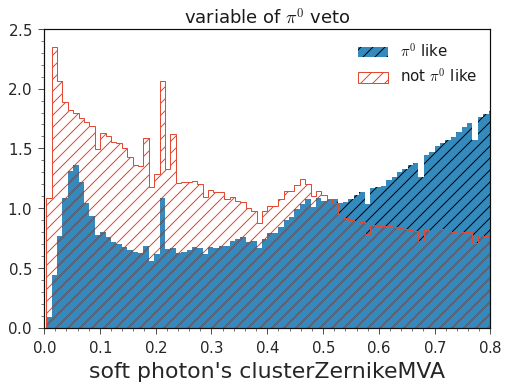

In [7]:
plt.hist(pd_df['daughter__bo1__cmclusterZernikeMVA__bc'], label=r'$\pi^0$ like',bins=100,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(pd_df1['daughter__bo1__cmclusterZernikeMVA__bc'], label=r'not $\pi^0$ like',bins=100,  histtype='step', density=True, hatch="//")

ax = plt.gca()
ax.set_xlim(0,0.8)   
xlabel = r"soft photon's clusterZernikeMVA"
plot_title = r'variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color`='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

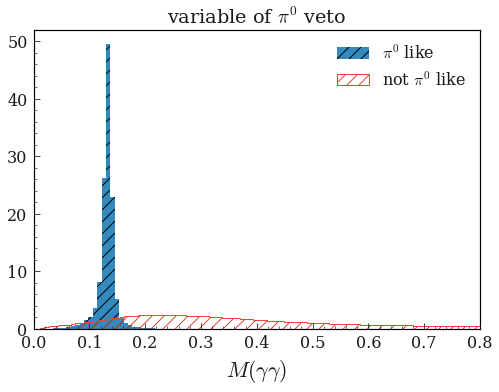

In [5]:
plt.hist(pd_df[pd_df['M']<0.8].M, label=r'$\pi^0$ like',bins=100,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(pd_df1[pd_df1['M']<0.8].M, label=r'not $\pi^0$ like',bins=100,  histtype='step', density=True, hatch="//")

ax = plt.gca()
ax.set_xlim(0,0.8)   
xlabel = r'$M(\gamma\gamma)$'
plot_title = r'variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color`='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

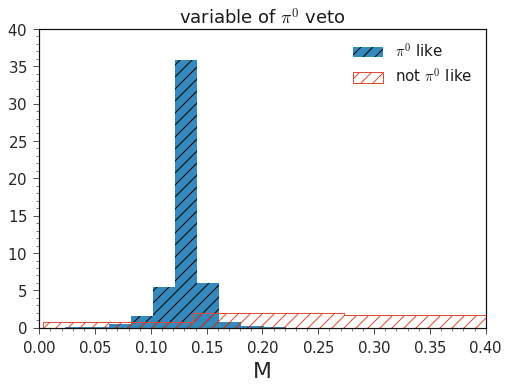

In [36]:
plt.hist(pd_df[ (pd_df['daughter__bo0__cmE__bc']>pd_df['daughter__bo1__cmE__bc']) ]['M'], label=r'$\pi^0$ like',bins=50,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(pd_df1[ (pd_df1['daughter__bo0__cmE__bc']>pd_df1['daughter__bo1__cmE__bc']) ]['M'], label=r'not $\pi^0$ like',bins=50,  histtype='step', density=True, hatch="//")

ax = plt.gca()
ax.set_xlim(0,0.4)   
xlabel = r'M'
plot_title = r'variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

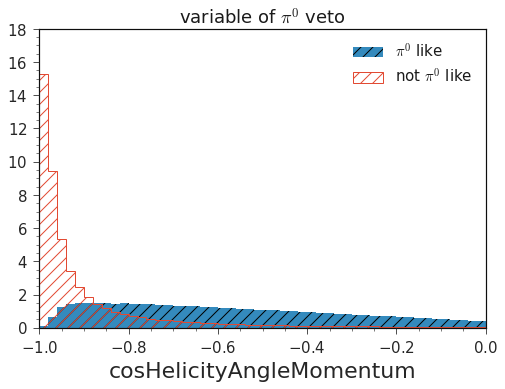

In [38]:

plt.hist(pd_df[ (pd_df['daughter__bo0__cmE__bc']>pd_df['daughter__bo1__cmE__bc']) ]['cosHelicityAngleMomentum'], label=r'$\pi^0$ like',bins=50,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(pd_df1[ (pd_df1['daughter__bo0__cmE__bc']>pd_df1['daughter__bo1__cmE__bc']) ]['cosHelicityAngleMomentum'], label=r'not $\pi^0$ like',bins=50,  histtype='step', density=True, hatch="//")

ax = plt.gca()
ax.set_xlim(-1,0)   
xlabel = r'cosHelicityAngleMomentum'
plot_title = r'variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

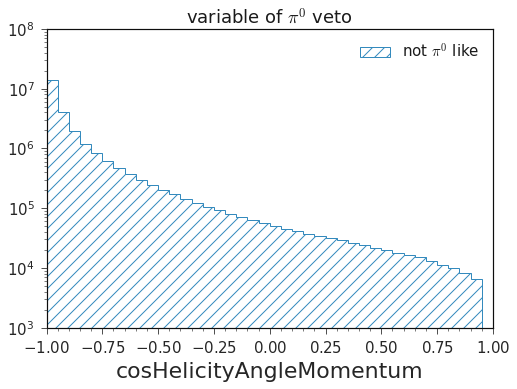

In [16]:
#plt.hist(pd_df['cosHelicityAngleMomentum'], label=r'$\pi^0$ like',bins=50,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(pd_df1['cosHelicityAngleMomentum'], label=r'not $\pi^0$ like',bins=plot_bins,  histtype='step', density=False, hatch="//")

ax = plt.gca()
ax.set_xlim(-1,1)   
xlabel = r'cosHelicityAngleMomentum'
plot_title = r'variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.yscale('log')
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

In [21]:
total=pd_df1.shape[0]

In [22]:
hard_is_bigger=pd_df1[ (pd_df1['daughter__bo0__cmE__bc']>pd_df1['daughter__bo1__cmE__bc'])].shape[0]

In [23]:
hard_fraction=hard_is_bigger/total

In [24]:
hard_fraction

0.9818469140015017

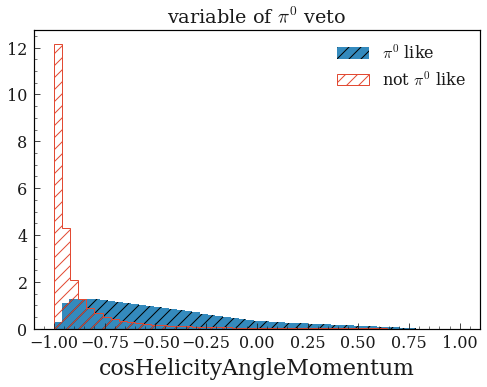

In [12]:
plt.hist(pd_df['cosHelicityAngleMomentum'], label=r'$\pi^0$ like',bins=50,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(pd_df1['cosHelicityAngleMomentum'], label=r'not $\pi^0$ like',bins=50,  histtype='step', density=True, hatch="//")

ax = plt.gca()
#ax.set_xlim(0,0.4)   
xlabel = r'cosHelicityAngleMomentum'
plot_title = r'variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

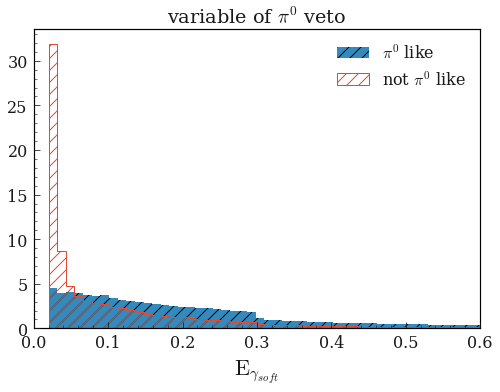

In [13]:
plt.hist(pd_df[pd_df['daughter__bo1__cmE__bc']<0.6].daughter__bo1__cmE__bc, label=r'$\pi^0$ like',bins=50,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(pd_df1[pd_df1['daughter__bo1__cmE__bc']<0.6].daughter__bo1__cmE__bc, label=r'not $\pi^0$ like',bins=50,  histtype='step', density=True, hatch="//")

ax = plt.gca()
ax.set_xlim(0,0.6)   
xlabel = r'$\mathrm{E}_{\gamma_{soft}}$'
plot_title = r'variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

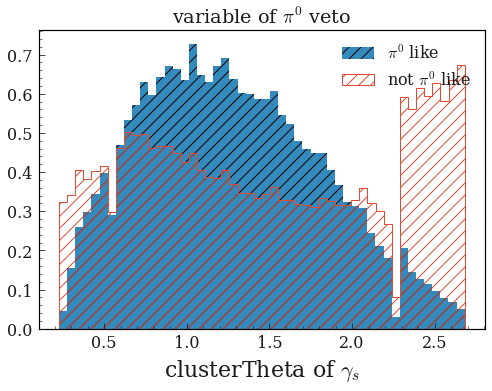

In [21]:
plt.hist(pd_df['daughter__bo1__cmclusterTheta__bc'], label=r'$\pi^0$ like',bins=50,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(pd_df1['daughter__bo1__cmclusterTheta__bc'], label=r'not $\pi^0$ like',bins=50,  histtype='step', density=True, hatch="//")

ax = plt.gca()
#ax.set_xlim(0,0.4)   
xlabel = r'clusterTheta of $\gamma_s$'
plot_title = r'variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

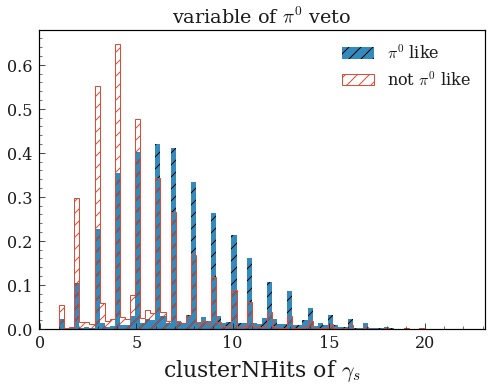

In [18]:
plt.hist(pd_df['daughter__bo1__cmclusterNHits__bc'], label=r'$\pi^0$ like',bins=80,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(pd_df1['daughter__bo1__cmclusterNHits__bc'], label=r'not $\pi^0$ like',bins=80,  histtype='step', density=True, hatch="//")

ax = plt.gca()
#ax.set_xlim(0,0.4)   
xlabel = r'clusterNHits of $\gamma_s$'
plot_title = r'variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

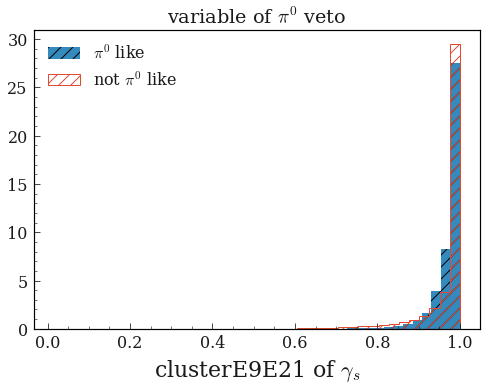

In [10]:
plt.hist(pd_df['daughter__bo1__cmclusterE9E21__bc'], label=r'$\pi^0$ like',bins=40,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(pd_df1['daughter__bo1__cmclusterE9E21__bc'], label=r'not $\pi^0$ like',bins=40,  histtype='step', density=True, hatch="//")

ax = plt.gca()
#ax.set_xlim(0,0.4)   
xlabel = r'clusterE9E21 of $\gamma_s$'
plot_title = r'variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper left')

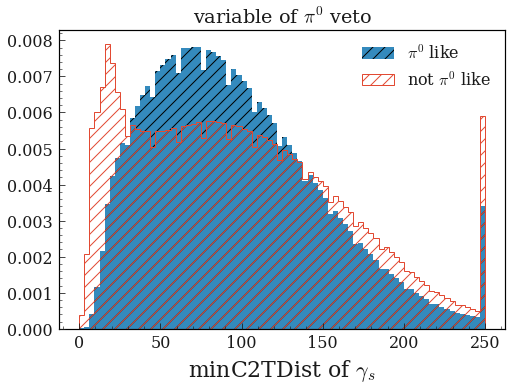

In [19]:
plt.hist(pd_df['daughter__bo1__cmminC2TDist__bc'], label=r'$\pi^0$ like',bins=80,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(pd_df1['daughter__bo1__cmminC2TDist__bc'], label=r'not $\pi^0$ like',bins=80,  histtype='step', density=True, hatch="//")

ax = plt.gca()
#ax.set_xlim(0,0.4)   
xlabel = r'minC2TDist of $\gamma_s$'
plot_title = r'variable of $\pi^0$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

In [3]:
#eta
file='/media/jykim/ssd_T5/storage/workspace/06_MVA/my_pi0etaveto/train_v1/etaveto_train.root'
#file='/group/belle/users/jaeyoung/storage/pi0etaveto/frac_0_3/merged_frac_0_3/pi0etaveto_all_generic_recon_output.root'
file2='/media/jykim/ssd_T5/storage/pi0etaveto/signal/frac_0_5_a/half_1M_0_recon_mdst_all.root'

base_filter='isSignal==1'
base_filter2='isSignal!=1 && daughter__bo0__cmgenMotherPDG__bc==421'
tree='eta'
variables=['M','cosHelicityAngleMomentum','daughter__bo1__cmE__bc','daughter__bo1__cmclusterTheta__bc','daughter__bo1__cmclusterNHits__bc',\
           'daughter__bo1__cmclusterE9E21__bc','daughter__bo1__cmminC2TDist__bc']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)
pd_df1 = get_data(file=file2, tree=tree,variables=variables ,base_filter=base_filter2)

KeyboardInterrupt: 

In [3]:
# file='/home/belle2/jaeyoung/workspace/06_MVA/my_pi0etaveto/train_v1/pi0veto_train.root'
file='/media/jykim/ssd_T5/storage/workspace/06_MVA/my_pi0etaveto/train_v1/etaveto_train.root'



# file='/group/belle/users/jaeyoung/storage/pi0etaveto/frac_0_3/merged_frac_0_3/pi0etaveto_all_generic_recon_output.root'
# file2='/group/belle/users/jaeyoung/storage/pi0etaveto/signal/frac_0_5_a/half_1M_0_recon_mdst_all.root'
file2='/media/jykim/ssd_T5/storage/pi0etaveto/signal/frac_0_5_a/half_1M_0_recon_mdst_all.root'



#base_filter='isSignal==1 && M<0.4'
#base_filter2='isSignal!=1 && M<0.4'
base_filter='isSignal==1'
# base_filter2='isSignal!=1 && daughter__bo0__cmgenMotherPDG__bc==421'
base_filter2='isSignal!=1'

tree='eta'
variables=['M','cosHelicityAngleMomentum','daughter__bo1__cmE__bc','daughter__bo1__cmclusterTheta__bc','daughter__bo1__cmclusterNHits__bc',\
           'daughter__bo1__cmclusterE9E21__bc','daughter__bo1__cmminC2TDist__bc','daughter__bo1__cmclusterZernikeMVA__bc']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)
pd_df1 = get_data(file=file2, tree=tree,variables=variables ,base_filter=base_filter2)

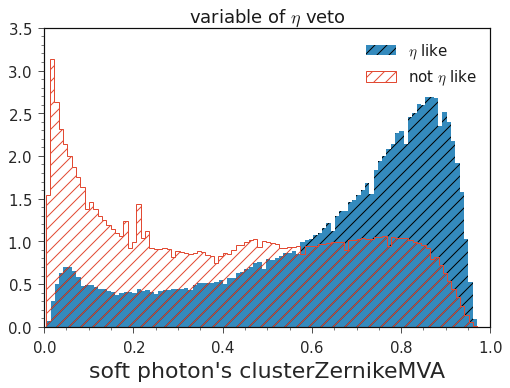

In [5]:
plt.hist(pd_df['daughter__bo1__cmclusterZernikeMVA__bc'], label=r'$\eta$ like',bins=100,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(pd_df1['daughter__bo1__cmclusterZernikeMVA__bc'],label=r'not $\eta$ like',bins=100,  histtype='step', density=True, hatch="//")

ax = plt.gca()
ax.set_xlim(0,1.0)   
xlabel = r"soft photon's clusterZernikeMVA"
plot_title = r'variable of $\eta$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color`='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

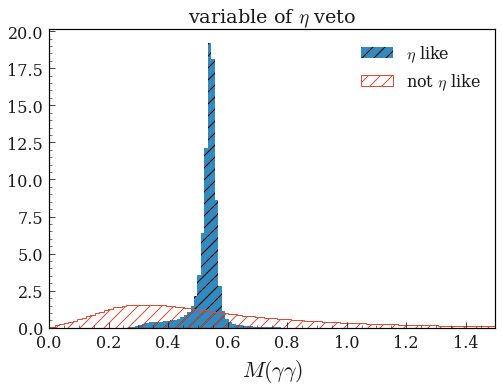

In [23]:
plt.hist(pd_df[pd_df['M']<1.5].M, label=r'$\eta$ like',bins=100,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(pd_df1[pd_df1['M']<1.5].M, label=r'not $\eta$ like',bins=100,  histtype='step', density=True, hatch="//")

ax = plt.gca()
ax.set_xlim(0,1.5)   
xlabel = r'$M(\gamma\gamma)$'
plot_title = r'variable of $\eta$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color`='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

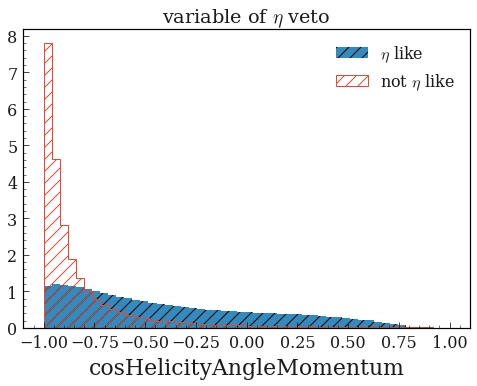

In [24]:
plt.hist(pd_df['cosHelicityAngleMomentum'], label=r'$\eta$ like',bins=50,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(pd_df1['cosHelicityAngleMomentum'], label=r'not $\eta$ like',bins=50,  histtype='step', density=True, hatch="//")

ax = plt.gca()
#ax.set_xlim(0,0.4)   
xlabel = r'cosHelicityAngleMomentum'
plot_title = r'variable of $\eta$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

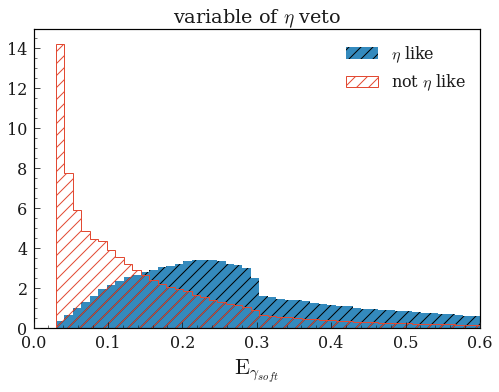

In [28]:
plt.hist(pd_df[pd_df['daughter__bo1__cmE__bc']<0.6].daughter__bo1__cmE__bc, label=r'$\eta$ like',bins=50,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(pd_df1[pd_df1['daughter__bo1__cmE__bc']<0.6].daughter__bo1__cmE__bc, label=r'not $\eta$ like',bins=50,  histtype='step', density=True, hatch="//")

ax = plt.gca()
ax.set_xlim(0,0.6)   
xlabel = r'$\mathrm{E}_{\gamma_{soft}}$'
plot_title = r'variable of $\eta$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

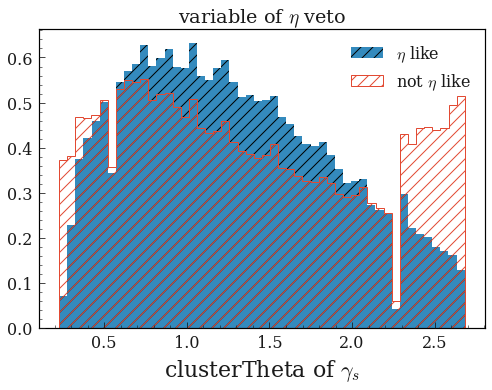

In [29]:
plt.hist(pd_df['daughter__bo1__cmclusterTheta__bc'], label=r'$\eta$ like',bins=50,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(pd_df1['daughter__bo1__cmclusterTheta__bc'], label=r'not $\eta$ like',bins=50,  histtype='step', density=True, hatch="//")

ax = plt.gca()
#ax.set_xlim(0,0.4)   
xlabel = r'clusterTheta of $\gamma_s$'
plot_title = r'variable of $\eta$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

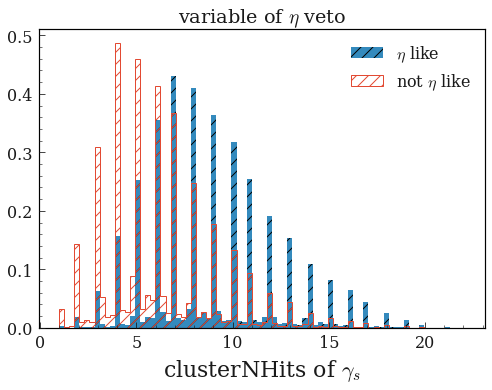

In [30]:
plt.hist(pd_df['daughter__bo1__cmclusterNHits__bc'], label=r'$\eta$ like',bins=80,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(pd_df1['daughter__bo1__cmclusterNHits__bc'], label=r'not $\eta$ like',bins=80,  histtype='step', density=True, hatch="//")

ax = plt.gca()
#ax.set_xlim(0,0.4)   
xlabel = r'clusterNHits of $\gamma_s$'
plot_title = r'variable of $\eta$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

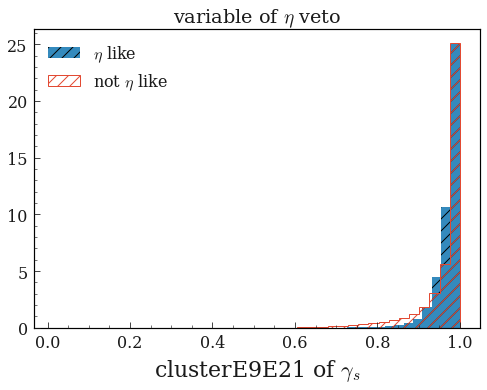

In [31]:
plt.hist(pd_df['daughter__bo1__cmclusterE9E21__bc'], label=r'$\eta$ like',bins=40,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(pd_df1['daughter__bo1__cmclusterE9E21__bc'], label=r'not $\eta$ like',bins=40,  histtype='step', density=True, hatch="//")

ax = plt.gca()
#ax.set_xlim(0,0.4)   
xlabel = r'clusterE9E21 of $\gamma_s$'
plot_title = r'variable of $\eta$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper left')

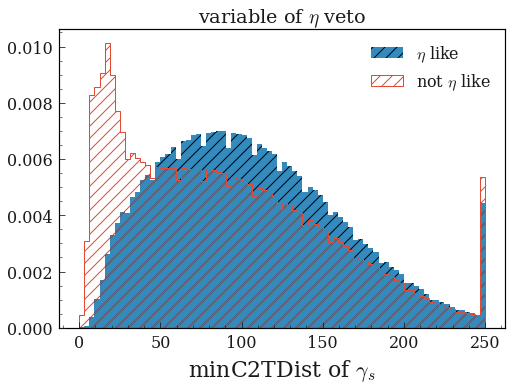

In [32]:
plt.hist(pd_df['daughter__bo1__cmminC2TDist__bc'], label=r'$\eta$ like',bins=80,  histtype='stepfilled', density=True, hatch="//") 
plt.hist(pd_df1['daughter__bo1__cmminC2TDist__bc'], label=r'not $\eta$ like',bins=80,  histtype='step', density=True, hatch="//")

ax = plt.gca()
#ax.set_xlim(0,0.4)   
xlabel = r'minC2TDist of $\gamma_s$'
plot_title = r'variable of $\eta$ veto'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

In [8]:
file ='/home/belle2/jaeyoung/workspace/04_gen/bkg_not_exist/done/D2pippimpi0/ntuple/recon_mdst_e6.root'
file1='/group/belle/users/jaeyoung/storage/01_recon/rho/pid_0_5_signalMC_recon_mdst_rho.root'
base_filter='(D0_M>1.665 && D0_M<2.065) && ( abs(Rho_M- 0.77526) < 0.245 ) && gamma_E>0.55 & Dstarp_CMS_p>2.72 && abs(Dstarp_Q-0.00593)<0.0006'
#base_filter += '&& (gamma_genMotherPDG==111) && (\Phi_genMotherPDG=421) && (gamma_genMotherID==Phi_genMotherID)'
base_filter1='(Dstarp_isSignal==1) && (D0_M>1.665 && D0_M<2.065) && ( abs(Rho_M- 0.77526) < 0.245 ) && gamma_E>0.55 & Dstarp_CMS_p>2.72 && abs(Dstarp_Q-0.00593)<0.0006'


tree='rho'
variables=['D0_M']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)
pd_df1 = get_data(file=file1, tree=tree,variables=variables ,base_filter=base_filter)

print(pd_df)
#plt.hist(pd_df['D0_M'], label=r'$D^0 \rightarrow \rho^0(\pi^+ \pi^-) \pi^0$',bins=100,  histtype='step') 
plt.hist(pd_df1['D0_M'], label=r'$D^0 \rightarrow \rho^0(\pi^+ \pi^-) \gamma$',bins=100,  histtype='step') 
ax = plt.gca()
ax.set_xlim(1.665, 2.065)   
xlabel = r'$M(D^0)$'
plot_title = '1M Signal MC'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

runtime_error: const vector<double>& ROOT::RDF::RResultPtr<vector<double> >::GetValue() =>
    runtime_error: 
An error occurred during just-in-time compilation in RLoopManager::Run. The lines above might indicate the cause of the crash
All RDF objects that have not run their event loop yet should be considered in an invalid state.


IncrementalExecutor::executeFunction: symbol '_ZN4ROOT8Internal3RDF13CacheLineStepIiEEmv' unresolved while linking [cling interface function]!
You are probably missing the definition of unsigned long ROOT::Internal::RDF::CacheLineStep<int>()
Maybe you need to load the corresponding shared library?
IncrementalExecutor::executeFunction: symbol '_ZSt4moveIRSt10shared_ptrIN4ROOT6Detail3RDF9RNodeBaseEEEONSt16remove_referenceIT_E4typeEOS8_' unresolved while linking [cling interface function]!
You are probably missing the definition of std::remove_reference<std::shared_ptr<ROOT::Detail::RDF::RNodeBase>&>::type&& std::move<std::shared_ptr<ROOT::Detail::RDF::RNodeBase>&>(std::shared_ptr<ROOT::Detail::RDF::RNodeBase>&)
Maybe you need to load the corresponding shared library?
IncrementalExecutor::executeFunction: symbol '_ZSt4fillIN9__gnu_cxx17__normal_iteratorIPySt6vectorIySaIyEEEEiEvT_S7_RKT0_' unresolved while linking [cling interface function]!
You are probably missing the definition of void 

In [10]:
file='/home/belle2/jaeyoung/workspace/06_MVA/my_pi0etaveto/train_v1/etaveto_train.root'
tree='eta'
variables=['M']
base_filter='isSignal==1'
pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)
#pd_df1 = get_data(file=file1, tree=tree,variables=variables ,base_filter=base_filter)

print(pd_df)
plt.hist(pd_df['M'], label=r'$D^0 \rightarrow \rho^0(\pi^+ \pi^-) \pi^0$',bins=100,  histtype='step') 
#plt.hist(pd_df1['D0_M'], label=r'$D^0 \rightarrow \rho^0(\pi^+ \pi^-) \gamma$',bins=100,  histtype='step') 
ax = plt.gca()
ax.set_xlim(1.665, 2.065)   
xlabel = r'$M(D^0)$'
plot_title = '1M Signal MC'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

SegmentationViolation: const vector<double>& ROOT::RDF::RResultPtr<vector<double> >::GetValue() =>
    SegmentationViolation: segfault in C++; program state was reset

 *** Break *** segmentation violation



There was a crash.
This is the entire stack trace of all threads:

Thread 24 (Thread 0x7fa6fc7c8700 (LWP 226210) "ZMQbg/IO/0"):
#0  0x00007fa923d56fd3 in epoll_wait () from /lib64/libc.so.6
#1  0x00007fa91b069ddf in ?? () from /cvmfs/belle.cern.ch/el7/externals/v01-11-00/Linux_x86_64/common/lib/python3.8/site-packages/zmq/backend/cython/../../../pyzmq.libs/libzmq-68c212d3.so.5.2.4
#2  0x00007fa91b089d99 in ?? () from /cvmfs/belle.cern.ch/el7/externals/v01-11-00/Linux_x86_64/common/lib/python3.8/site-packages/zmq/backend/cython/../../../pyzmq.libs/libzmq-68c212d3.so.5.2.4
#3  0x00007fa91b0b2014 in ?? () from /cvmfs/belle.cern.ch/el7/externals/v01-11-00/Linux_x86_64/common/lib/python3.8/site-packages/zmq/backend/cython/../../../pyzmq.libs/libzmq-68c212d3.so.5.2.4
#4  0x00007fa924736ea5 in start_thread () from /lib64/libpthread.so.0
#5  0x00007fa923d569fd in clone () from /lib64/libc.so.6

Thread 23 (Thread 0x7fa6f3fc7700 (LWP 226209) "ZMQbg/Reaper

In [9]:
#file = '/group/belle/users/jaeyoung/storage/01_recon/train/recon_output.root'
#file = '/home/jykim/nas/storage/01_recon/merge_generic_bkg/ccbar/train_v1_yes_signal_ccbar_recon_output_02.root'
file = '/home/jykim/nas/storage/01_recon/antiKstar/expert_signalMC_recon_mdst_antiKstar.root'
#file = '/home/jykim/nas/storage/01_recon/merge_generic_bkg/ccbar/topo_pid_0_5_no_signal_ccbar_recon_output_00.root'
tree = 'antiKstar'
base_filter = 'Dstarp_isSignal==1 && gamma_E>0.3 && gamma_clusterSecondMoment<=1.5'
#base_filter = '(Dstarp_isSignal==1) && '+ Filter['antiKstar']
#variables=['pip_E','pim_E','pi0_E','pip_px','pim_px','pi0_px','pip_py','pim_py','pi0_py','pip_pz','pim_pz','pi0_pz']
variables=['Pi0_Prob']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

plt.hist(pd_df['Pi0_Prob'], label=r'$\bar{K}^{*0}$',bins=100,  histtype='step') 
ax = plt.gca()
ax.set_xlim(0, 1)   
xlabel = r'$\pi^0$ Prob'
plot_title = '0.5M Signal MC'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

runtime_error: string ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::GetColumnType(basic_string_view<char,char_traits<char> > column) =>
    runtime_error: Column "Pi0_Prob" is not in a dataset and is not a custom column been defined.

Error in <TFile::TFile>: file /home/jykim/nas/storage/01_recon/antiKstar/expert_signalMC_recon_mdst_antiKstar.root does not exist
Error in <TFile::TFile>: file /home/jykim/nas/storage/01_recon/antiKstar/expert_signalMC_recon_mdst_antiKstar.root does not exist
Error in <TFile::TFile>: file /home/jykim/nas/storage/01_recon/antiKstar/expert_signalMC_recon_mdst_antiKstar.root does not exist
Error in <TFile::TFile>: file /home/jykim/nas/storage/01_recon/antiKstar/expert_signalMC_recon_mdst_antiKstar.root does not exist


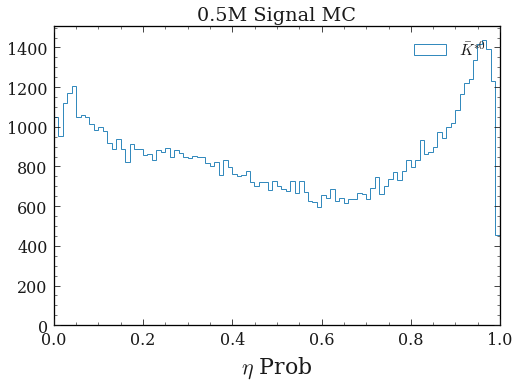

In [42]:
#file = '/group/belle/users/jaeyoung/storage/01_recon/train/recon_output.root'
#file = '/home/jykim/nas/storage/01_recon/merge_generic_bkg/ccbar/train_v1_yes_signal_ccbar_recon_output_02.root'
file = '/home/jykim/nas/storage/01_recon/antiKstar/expert_signalMC_recon_mdst_antiKstar.root'
#file = '/home/jykim/nas/storage/01_recon/merge_generic_bkg/ccbar/topo_pid_0_5_no_signal_ccbar_recon_output_00.root'
tree = 'antiKstar'
base_filter = 'Dstarp_isSignal==1 && gamma_E>0.3 && gamma_clusterSecondMoment<=1.5'
#base_filter = 'Dstarp_isSignal==1 && ' + Filter['antiKstar']
#variables=['pip_E','pim_E','pi0_E','pip_px','pim_px','pi0_px','pip_py','pim_py','pi0_py','pip_pz','pim_pz','pi0_pz']
variables=['Eta_Prob']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

plt.hist(pd_df['Eta_Prob'], label=r'$\bar{K}^{*0}$',bins=100,  histtype='step') 
ax = plt.gca()
ax.set_xlim(0, 1)   
xlabel = r'$\eta$ Prob'
plot_title = '0.5M Signal MC'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

In [5]:
file = '/home/jykim/nas/storage/01_recon/rho/expert_signalMC_recon_mdst_rho.root'
tree = 'rho'
base_filter = 'Dstarp_isSignal==1 && gamma_E>0.3 && gamma_clusterSecondMoment<=1.5'
#variables=['pip_E','pim_E','pi0_E','pip_px','pim_px','pi0_px','pip_py','pim_py','pi0_py','pip_pz','pim_pz','pi0_pz']
variables=['Pi0_Prob']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

plt.hist(pd_df['Pi0_Prob'], label=r'$\rho^0$',bins=100,  histtype='stepfilled', hatch="//") 
ax = plt.gca()
ax.set_xlim(0, 1)   
xlabel = r'$\pi^0$ Prob'
plot_title = '0.5M Signal MC'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

runtime_error: string ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::GetColumnType(basic_string_view<char,char_traits<char> > column) =>
    runtime_error: Column "Pi0_Prob" is not in a dataset and is not a custom column been defined.

Error in <TFile::TFile>: file /home/jykim/nas/storage/01_recon/rho/expert_signalMC_recon_mdst_rho.root does not exist
Error in <TFile::TFile>: file /home/jykim/nas/storage/01_recon/rho/expert_signalMC_recon_mdst_rho.root does not exist
Error in <TFile::TFile>: file /home/jykim/nas/storage/01_recon/rho/expert_signalMC_recon_mdst_rho.root does not exist
Error in <TFile::TFile>: file /home/jykim/nas/storage/01_recon/rho/expert_signalMC_recon_mdst_rho.root does not exist


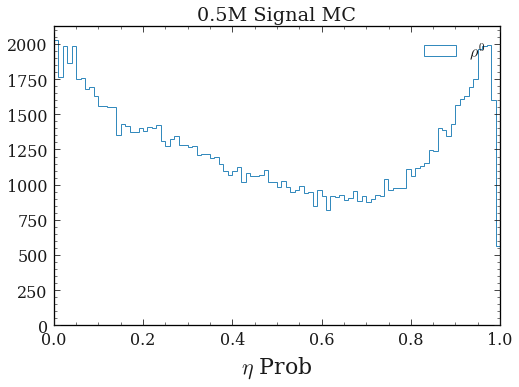

In [43]:
file = '/home/jykim/nas/storage/01_recon/rho/expert_signalMC_recon_mdst_rho.root'
tree = 'rho'
base_filter = 'Dstarp_isSignal==1 && gamma_E>0.3 && gamma_clusterSecondMoment<=1.5'
#variables=['pip_E','pim_E','pi0_E','pip_px','pim_px','pi0_px','pip_py','pim_py','pi0_py','pip_pz','pim_pz','pi0_pz']
variables=['Eta_Prob']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

plt.hist(pd_df['Eta_Prob'], label=r'$\rho^0$',bins=100,  histtype='step') 
ax = plt.gca()
ax.set_xlim(0, 1)   
xlabel = r'$\eta$ Prob'
plot_title = '0.5M Signal MC'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

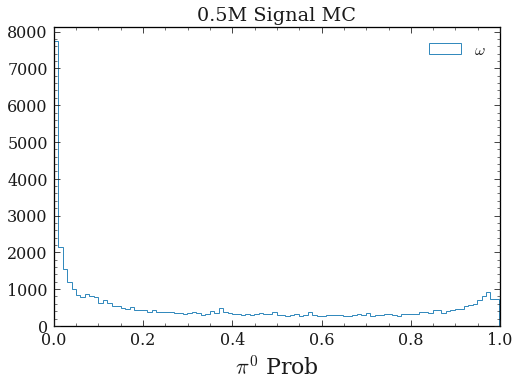

In [28]:
file = '/home/jykim/nas/storage/01_recon/omega/expert_signalMC_recon_mdst_omega.root'
tree = 'omega'
base_filter = 'Dstarp_isSignal==1 && gamma_E>0.3 && gamma_clusterSecondMoment<=1.5'
#variables=['pip_E','pim_E','pi0_E','pip_px','pim_px','pi0_px','pip_py','pim_py','pi0_py','pip_pz','pim_pz','pi0_pz']
variables=['Pi0_Prob']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

plt.hist(pd_df['Pi0_Prob'], label=r'$\omega$',bins=100,  histtype='step') 
ax = plt.gca()
ax.set_xlim(0, 1)   
xlabel = r'$\pi^0$ Prob'
plot_title = '0.5M Signal MC'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

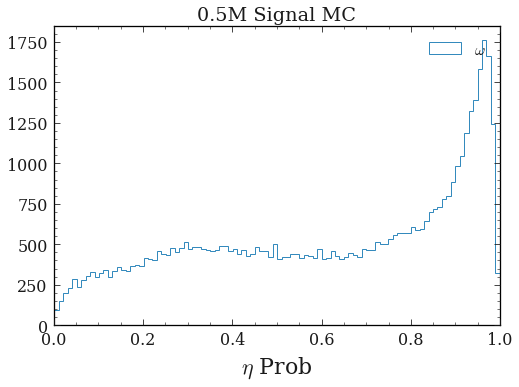

In [44]:
file = '/home/jykim/nas/storage/01_recon/omega/expert_signalMC_recon_mdst_omega.root'
tree = 'omega'
base_filter = 'Dstarp_isSignal==1 && gamma_E>0.3 && gamma_clusterSecondMoment<=1.5'
#variables=['pip_E','pim_E','pi0_E','pip_px','pim_px','pi0_px','pip_py','pim_py','pi0_py','pip_pz','pim_pz','pi0_pz']
variables=['Eta_Prob']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

plt.hist(pd_df['Eta_Prob'], label=r'$\omega$',bins=100,  histtype='step') 
ax = plt.gca()
ax.set_xlim(0, 1)   
xlabel = r'$\eta$ Prob'
plot_title = '0.5M Signal MC'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

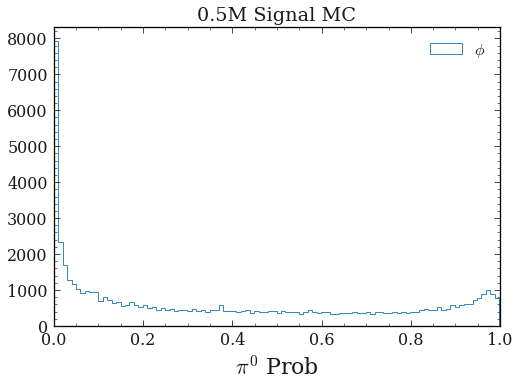

In [29]:
file = '/home/jykim/nas/storage/01_recon/phi/expert_signalMC_recon_mdst_phi.root'
tree = 'phi'
base_filter = 'Dstarp_isSignal==1 && gamma_E>0.3 && gamma_clusterSecondMoment<=1.5'
#variables=['pip_E','pim_E','pi0_E','pip_px','pim_px','pi0_px','pip_py','pim_py','pi0_py','pip_pz','pim_pz','pi0_pz']
variables=['Pi0_Prob']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

plt.hist(pd_df['Pi0_Prob'], label=r'$\phi$',bins=100,  histtype='step') 
ax = plt.gca()
ax.set_xlim(0, 1)   
xlabel = r'$\pi^0$ Prob'
plot_title = '0.5M Signal MC'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

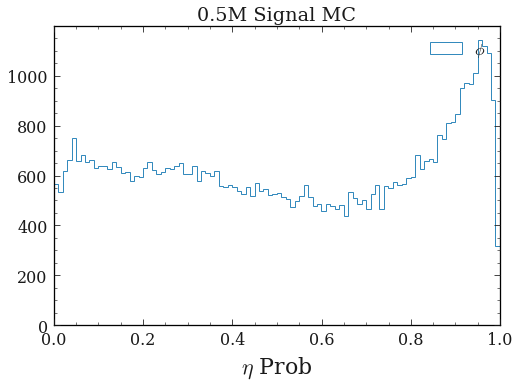

In [45]:
file = '/home/jykim/nas/storage/01_recon/phi/expert_signalMC_recon_mdst_phi.root'
tree = 'phi'
base_filter = 'Dstarp_isSignal==1 && gamma_E>0.3 && gamma_clusterSecondMoment<=1.5'
#variables=['pip_E','pim_E','pi0_E','pip_px','pim_px','pi0_px','pip_py','pim_py','pi0_py','pip_pz','pim_pz','pi0_pz']
variables=['Eta_Prob']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)



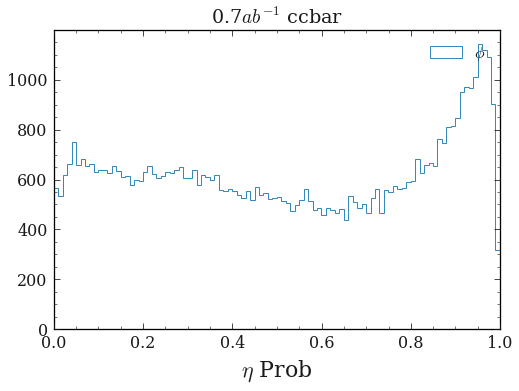

In [22]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# some random data
x = np.random.randn(1000)
y = np.random.randn(1000)


def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

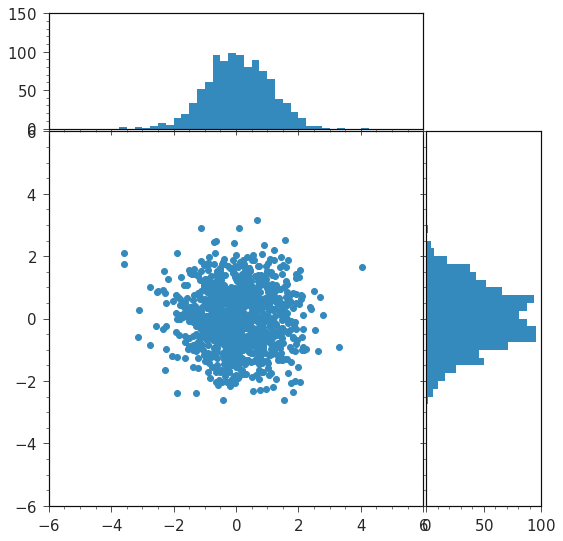

In [24]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(x, y, ax, ax_histx, ax_histy)

plt.show()


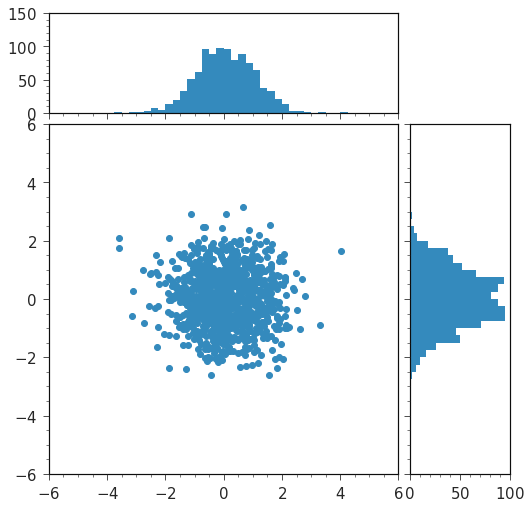

In [25]:
# start with a square Figure
fig = plt.figure(figsize=(8, 8))

# Add a gridspec with two rows and two columns and a ratio of 2 to 7 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

# use the previously defined function
scatter_hist(x, y, ax, ax_histx, ax_histy)

plt.show()